## <center> DNS Detection Pipeline <center>
<center> Krishnendu Das <center>

<center> The implementation of our project is contained in this portion of the project. <center> 

 Data Source: 
 http://205.174.165.80/CICDataset/DoHBrw-2020/Dataset/
 
 https://www.unb.ca/cic/datasets/dohbrw-2020.html 

In [2]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from imblearn.under_sampling import ClusterCentroids
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import normalize
from sklearn.ensemble import ExtraTreesClassifier

# Importing the data and Preprocessing

The dataset used for this implementation includes DoH protocol captures of Benign-DoH and Malicious-DoH. The browsers and tools used to capture this traffic include Google Chrome, Mozilla Firefox, dns2tcp, DNSCat2, and Iodine while the servers used to respond to DoH requests are AdGuard, Cloudflare, Google DNS, and Quad9.

At this stage the data was imported and preprocessed to set up for the various analysis, feature selection and classification techniques (both supervised and unsupervised learning). 

In [3]:
data_ben = pd.read_csv('l2-benign.csv', sep=',')
print(f'Number of benign = {len(data_ben)}')
data_ben.head()

Number of benign = 9999


SourceIP    DestinationIP  SourcePort  DestinationPort  \
0   192.168.20.191  176.103.130.131       50749              443   
1   192.168.20.191  176.103.130.131       50749              443   
2   192.168.20.191  176.103.130.131       50749              443   
3   192.168.20.191  176.103.130.131       50749              443   
4  176.103.130.131   192.168.20.191         443            50749   

             TimeStamp    Duration  FlowBytesSent  FlowSentRate  \
0  2020-01-14 15:49:11   95.081550          62311    655.342703   
1  2020-01-14 15:50:52  122.309318          93828    767.136973   
2  2020-01-14 15:52:55  120.958413          38784    320.639127   
3  2020-01-14 15:54:56  110.501080          61993    561.017141   
4  2020-01-14 15:56:46   54.229891          83641   1542.341289   

   FlowBytesReceived  FlowReceivedRate  ...  PacketTimeCoefficientofVariation  \
0              65358        687.388878  ...                          0.574626   
1             101232        827.672018  ...                          0.509047   
2              38236        316.108645  ...                          0.732636   
3              69757        631.278898  ...                          0.646859   
4              76804       1416.266907  ...                          0.507334   

   ResponseTimeTimeVariance  ResponseTimeTimeStandardDeviation  \
0                  0.001053                           0.032457   
1                  0.001170                           0.034200   
2                  0.000785                           0.028021   
3                  0.000411                           0.020274   
4                  0.079079                           0.281209   

   ResponseTimeTimeMean  ResponseTimeTimeMedian  ResponseTimeTimeMode  \
0              0.027624                0.026854              0.026822   
1              0.024387                0.021043              0.026981   
2              0.029238                0.026922              0.026855   
3              0.019925                0.019268              0.026918   
4              0.025930                0.000046              0.000021   

   ResponseTimeTimeSkewFromMedian  ResponseTimeTimeSkewFromMode  \
0                        0.071187                      0.024715   
1                        0.293297                     -0.075845   
2                        0.248064                      0.085061   
3                        0.097199                     -0.344926   
4                        0.276133                      0.092135   

   ResponseTimeTimeCoefficientofVariation   Label  
0                                1.174948  Benign  
1                                1.402382  Benign  
2                                0.958348  Benign  
3                                1.017535  Benign  
4                               10.844829  Benign  

[5 rows x 35 columns]

In [4]:
data_mal = pd.read_csv('l2-malicious.csv', sep=',')
print(f'Number of malicious = {len(data_mal)}')
data_mal.head()

Number of malicious = 249836


SourceIP   DestinationIP  SourcePort  DestinationPort  \
0  192.168.20.205         8.8.4.4       41018              443   
1         8.8.4.4  192.168.20.205         443            41018   
2         8.8.4.4  192.168.20.205         443            41018   
3         8.8.4.4  192.168.20.205         443            41018   
4         8.8.4.4  192.168.20.205         443            41018   

             TimeStamp    Duration  FlowBytesSent  FlowSentRate  \
0  2020-03-25 04:40:42  120.731389          46446    384.705257   
1  2020-03-25 04:42:42  120.052751         470548   3919.510349   
2  2020-03-25 04:44:42  120.034398         747083   6223.907584   
3  2020-03-25 04:46:42  120.004804         745382   6211.268009   
4  2020-03-25 04:48:42  120.025620         749888   6247.732776   

   FlowBytesReceived  FlowReceivedRate  ...  PacketTimeCoefficientofVariation  \
0              85465        707.893786  ...                          0.622162   
1             227661       1896.341384  ...                          0.331509   
2             355181       2958.993471  ...                          0.579348   
3             354606       2954.931704  ...                          0.580188   
4             356531       2970.457474  ...                          0.578922   

   ResponseTimeTimeVariance  ResponseTimeTimeStandardDeviation  \
0                  0.000070                           0.008369   
1                  0.023756                           0.154130   
2                  0.000276                           0.016611   
3                  0.000271                           0.016473   
4                  0.000271                           0.016458   

   ResponseTimeTimeMean  ResponseTimeTimeMedian  ResponseTimeTimeMode  \
0              0.011880                0.015244              0.015221   
1              0.037553                0.000049              0.000039   
2              0.011986                0.000048              0.000030   
3              0.011724                0.000049              0.000031   
4              0.011725                0.000048              0.000031   

   ResponseTimeTimeSkewFromMedian  ResponseTimeTimeSkewFromMode  \
0                       -1.205904                     -0.399220   
1                        0.729988                      0.243394   
2                        2.156008                      0.719753   
3                        2.126128                      0.709802   
4                        2.128463                      0.710521   

   ResponseTimeTimeCoefficientofVariation      Label  
0                                0.704513  Malicious  
1                                4.104293  Malicious  
2                                1.385888  Malicious  
3                                1.405118  Malicious  
4                                1.403698  Malicious  

[5 rows x 35 columns]

## Feature list

In [5]:
data_mal.columns

Index(['SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort',
       'TimeStamp', 'Duration', 'FlowBytesSent', 'FlowSentRate',
       'FlowBytesReceived', 'FlowReceivedRate', 'PacketLengthVariance',
       'PacketLengthStandardDeviation', 'PacketLengthMean',
       'PacketLengthMedian', 'PacketLengthMode', 'PacketLengthSkewFromMedian',
       'PacketLengthSkewFromMode', 'PacketLengthCoefficientofVariation',
       'PacketTimeVariance', 'PacketTimeStandardDeviation', 'PacketTimeMean',
       'PacketTimeMedian', 'PacketTimeMode', 'PacketTimeSkewFromMedian',
       'PacketTimeSkewFromMode', 'PacketTimeCoefficientofVariation',
       'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation',
       'ResponseTimeTimeMean', 'ResponseTimeTimeMedian',
       'ResponseTimeTimeMode', 'ResponseTimeTimeSkewFromMedian',
       'ResponseTimeTimeSkewFromMode',
       'ResponseTimeTimeCoefficientofVariation', 'Label'],
      dtype='object')

In [6]:
print(f"Features given by the original dataset = {len(data_mal.columns)}")

Features given by the original dataset = 35


## Merging Data

* Merging data for initial tests. 
* Benign to 0 and Malicious to 1.
* Dropping SourceIP and DestinationIP. 

In [7]:
data = pd.concat([data_ben, data_mal]).dropna()

data['Label'] = data['Label'].apply(lambda x: 1 if x == 'Malicious' else 0)

print(len(data[data['Label'] == 1]))
print(len(data[data['Label'] == 0]))
data = data.drop(columns=['SourceIP', 'DestinationIP', 'TimeStamp'])

data.head(5)

249553
9986


SourcePort  DestinationPort    Duration  FlowBytesSent  FlowSentRate  \
0       50749              443   95.081550          62311    655.342703   
1       50749              443  122.309318          93828    767.136973   
2       50749              443  120.958413          38784    320.639127   
3       50749              443  110.501080          61993    561.017141   
4         443            50749   54.229891          83641   1542.341289   

   FlowBytesReceived  FlowReceivedRate  PacketLengthVariance  \
0              65358        687.388878           7474.676771   
1             101232        827.672018          10458.118598   
2              38236        316.108645           7300.293933   
3              69757        631.278898           8499.282518   
4              76804       1416.266907           8052.745751   

   PacketLengthStandardDeviation  PacketLengthMean  ...  \
0                      86.456213        135.673751  ...   
1                     102.264943        141.245474  ...   
2                      85.441758        133.715278  ...   
3                      92.191553        139.123548  ...   
4                      89.737092        138.913420  ...   

   PacketTimeCoefficientofVariation  ResponseTimeTimeVariance  \
0                          0.574626                  0.001053   
1                          0.509047                  0.001170   
2                          0.732636                  0.000785   
3                          0.646859                  0.000411   
4                          0.507334                  0.079079   

   ResponseTimeTimeStandardDeviation  ResponseTimeTimeMean  \
0                           0.032457              0.027624   
1                           0.034200              0.024387   
2                           0.028021              0.029238   
3                           0.020274              0.019925   
4                           0.281209              0.025930   

   ResponseTimeTimeMedian  ResponseTimeTimeMode  \
0                0.026854              0.026822   
1                0.021043              0.026981   
2                0.026922              0.026855   
3                0.019268              0.026918   
4                0.000046              0.000021   

   ResponseTimeTimeSkewFromMedian  ResponseTimeTimeSkewFromMode  \
0                        0.071187                      0.024715   
1                        0.293297                     -0.075845   
2                        0.248064                      0.085061   
3                        0.097199                     -0.344926   
4                        0.276133                      0.092135   

   ResponseTimeTimeCoefficientofVariation  Label  
0                                1.174948      0  
1                                1.402382      0  
2                                0.958348      0  
3                                1.017535      0  
4                               10.844829      0  

[5 rows x 32 columns]

In [8]:
X, y = data.drop(columns=['Label']), data['Label']

In [9]:
X

SourcePort  DestinationPort    Duration  FlowBytesSent  FlowSentRate  \
0            50749              443   95.081550          62311    655.342703   
1            50749              443  122.309318          93828    767.136973   
2            50749              443  120.958413          38784    320.639127   
3            50749              443  110.501080          61993    561.017141   
4              443            50749   54.229891          83641   1542.341289   
...            ...              ...         ...            ...           ...   
249831         443            33926  120.653838          78776    652.909193   
249832         443            33926  120.718680          78719    652.086322   
249833         443            33926  120.645723          78808    653.218349   
249834         443            33926  120.652326          77281    640.526400   
249835         443            33926   30.951614          23514    759.701901   

        FlowBytesReceived  FlowReceivedRate  PacketLengthVariance  \
0                   65358        687.388878           7474.676771   
1                  101232        827.672018          10458.118598   
2                   38236        316.108645           7300.293933   
3                   69757        631.278898           8499.282518   
4                   76804       1416.266907           8052.745751   
...                   ...               ...                   ...   
249831              46073        381.861040           7979.982650   
249832              46047        381.440553           8141.129962   
249833              46118        382.259718           8648.833760   
249834              46015        381.385105          11417.273333   
249835              13884        448.571115           8107.633456   

        PacketLengthStandardDeviation  PacketLengthMean  ...  \
0                           86.456213        135.673751  ...   
1                          102.264943        141.245474  ...   
2                           85.441758        133.715278  ...   
3                           92.191553        139.123548  ...   
4                           89.737092        138.913420  ...   
...                               ...               ...  ...   
249831                      89.330749        121.566699  ...   
249832                      90.228210        121.604288  ...   
249833                      92.999106        122.476471  ...   
249834                     106.851642        125.300813  ...   
249835                      90.042398        121.029126  ...   

        PacketTimeSkewFromMode  PacketTimeCoefficientofVariation  \
0                     1.682529                          0.574626   
1                     0.772748                          0.509047   
2                     1.353607                          0.732636   
3                     1.148758                          0.646859   
4                     1.573873                          0.507334   
...                        ...                               ...   
249831                1.627348                          0.614497   
249832                1.623502                          0.615953   
249833                1.547221                          0.646320   
249834                1.685458                          0.593311   
249835                1.396885                          0.715879   

        ResponseTimeTimeVariance  ResponseTimeTimeStandardDeviation  \
0                   1.053454e-03                           0.032457   
1                   1.169641e-03                           0.034200   
2                   7.851554e-04                           0.028021   
3                   4.110453e-04                           0.020274   
4                   7.907866e-02                           0.281209   
...                          ...                                ...   
249831              8.716113e-09                           0.000093   
249832              8.737216e-07                           0.000

In [10]:
original_features = X
original_labels = y

# Unsupervised Learning

## t-SNE 2D & 3D

After the initial preprocessing, t-SNE was applied to the data set in order to visualize the features. 

In [11]:
X_embedded = TSNE(n_components = 2, random_state = 0).fit_transform(X)

In [12]:
pd.DataFrame(X_embedded).to_csv('tSNE Initial.csv', sep=',')
X_embedded = np.array(pd.read_csv('tSNE initial.csv', sep=',').drop(columns=['Unnamed: 0']))

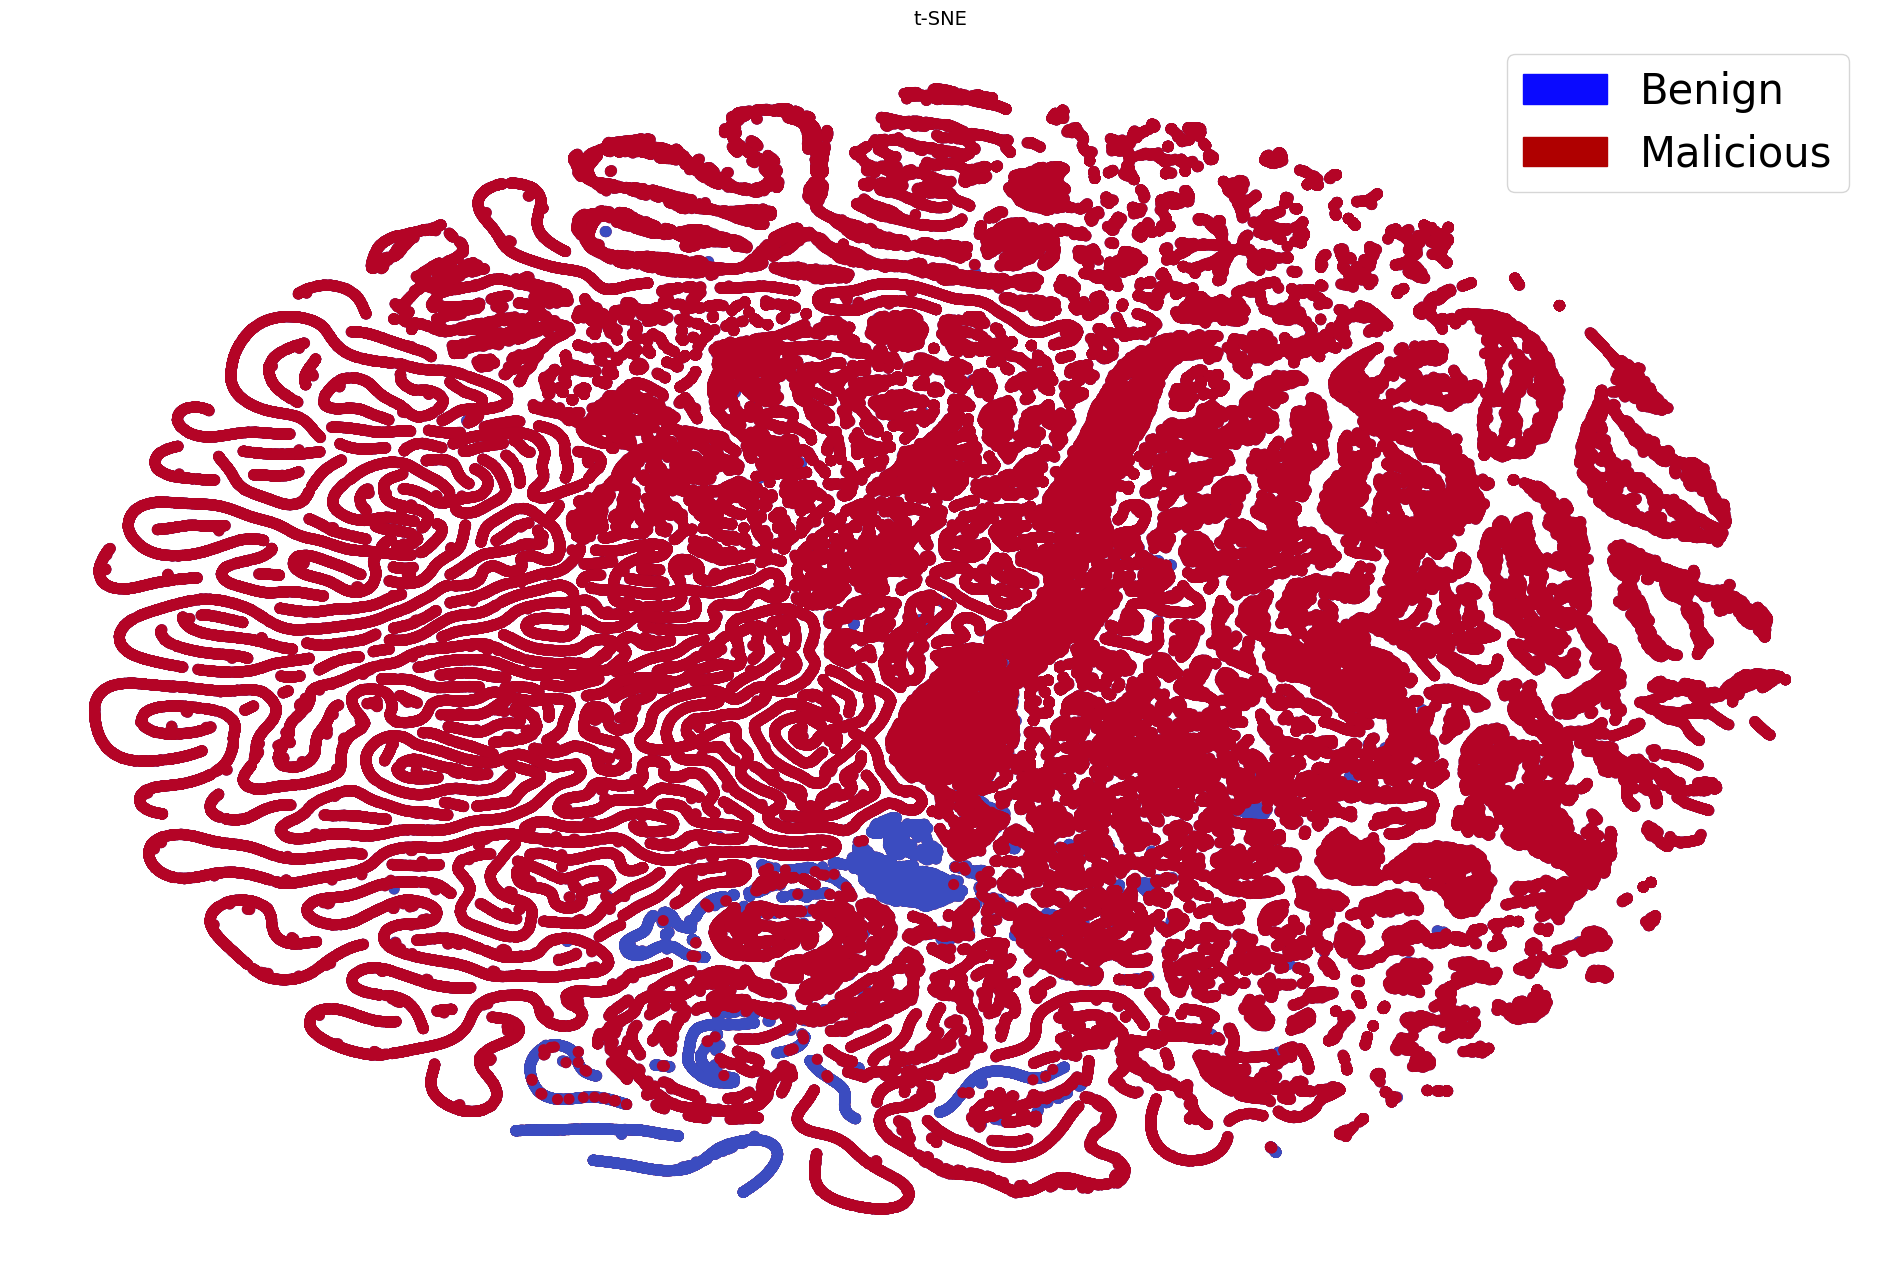

In [13]:
f, ax = plt.subplots(figsize=(24,16))

blue_patch = mpatches.Patch(color='#0A0AFF', label='Benign')
red_patch = mpatches.Patch(color='#AF0000', label='Malicious')

blue_patch = mpatches.Patch(color='#0A0AFF', label='Benign')
red_patch = mpatches.Patch(color='#AF0000', label='Malicious')

cmap = 'Purples'

ax.scatter(X_embedded[:,0], X_embedded[:,1], c=(y == 0), cmap='coolwarm', label='Benign', linewidths=2)
ax.scatter(X_embedded[:,0], X_embedded[:,1], c=(y == 1), cmap='coolwarm', label='Malicious', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(False)
ax.axis('off')

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])

ax.legend(handles=[blue_patch, red_patch], fontsize=30)

In [14]:
X_embedded_3d = TSNE(n_components = 3, random_state = 0).fit_transform(X)

In [15]:
pd.DataFrame(X_embedded_3d).to_csv('tSNE_initial_3d.csv', sep=',')
X_embedded_3d = np.array(pd.read_csv('tSNE_initial_3d.csv', sep=',').drop(columns=['Unnamed: 0']))

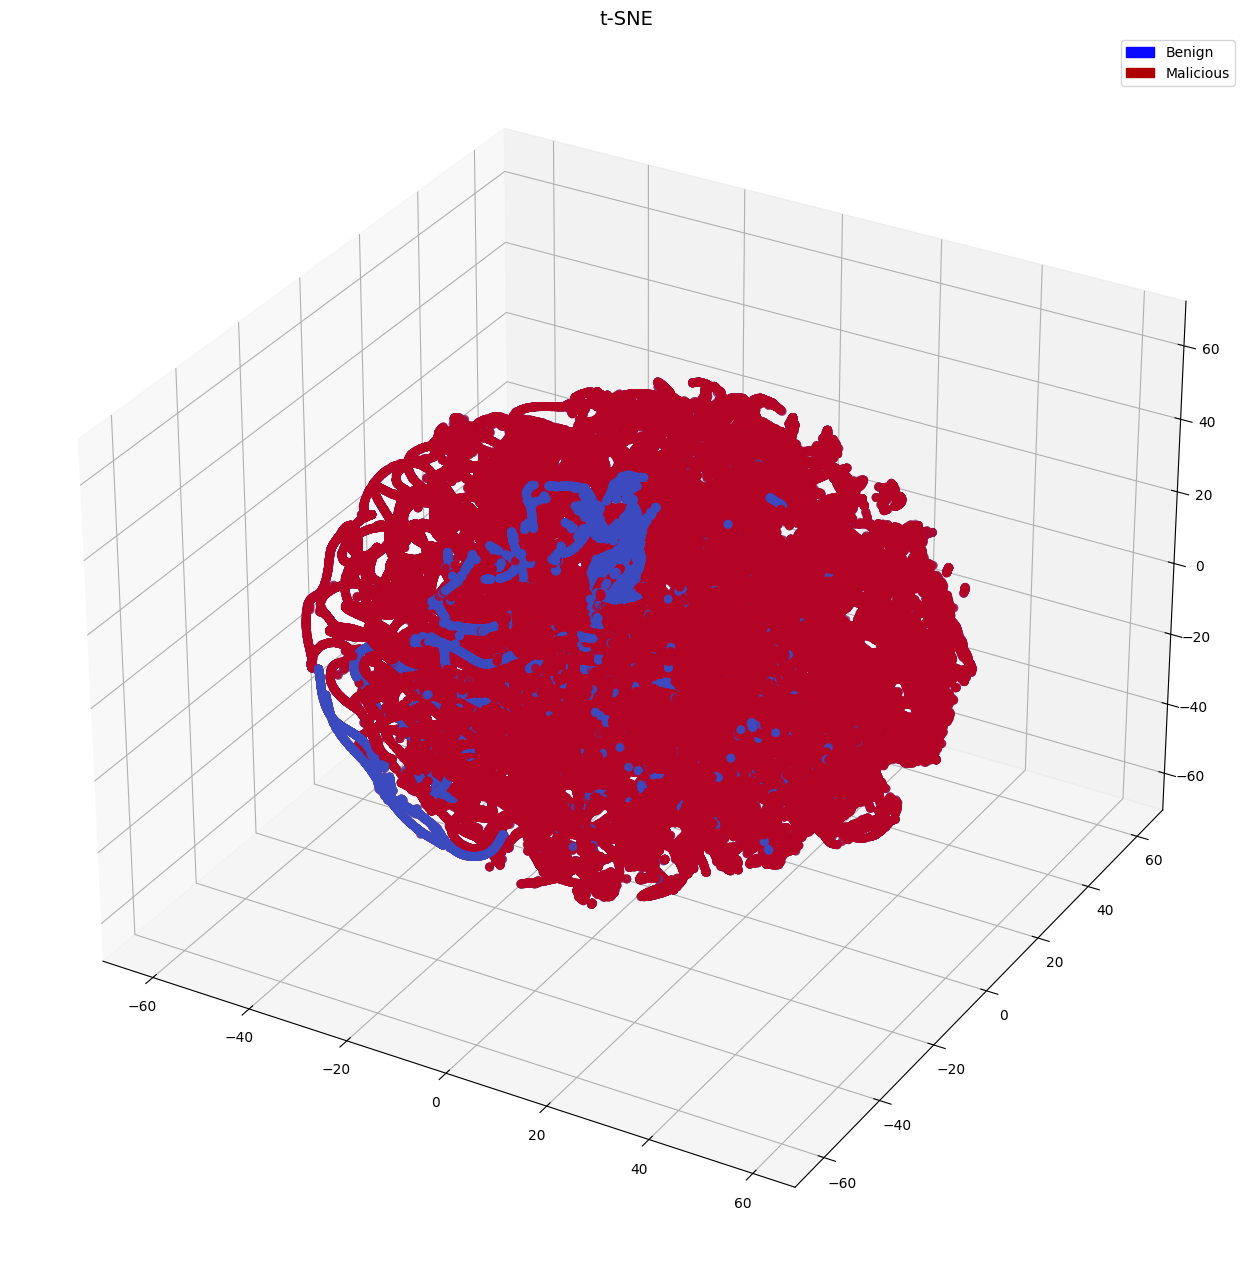

In [16]:
fig = plt.figure(figsize = (24,16))
ax = fig.add_subplot(111, projection='3d')

blue_patch = mpatches.Patch(color='#0A0AFF', label='Benign')
red_patch = mpatches.Patch(color='#AF0000', label='Malicious')

ax.scatter(X_embedded_3d[:,0], X_embedded_3d[:,1], X_embedded_3d[:,2], c=(y == 0), cmap= 'coolwarm', label='Benign', linewidths=2)
ax.scatter(X_embedded_3d[:,0], X_embedded_3d[:,1], X_embedded_3d[:,2], c=(y == 1), cmap='coolwarm', label='Malicious', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

# Unsupervised Learning

## PCA 2D & 3D

After the initial preprocessing, PCA was applied to the data set in order to visualize the features. 

In [17]:
X_embedded = PCA(n_components = 2, random_state = 0).fit_transform(X)

In [18]:
pd.DataFrame(X_embedded).to_csv('PCA Initial.csv', sep=',')
X_embedded = np.array(pd.read_csv('PCA initial.csv', sep=',').drop(columns=['Unnamed: 0']))

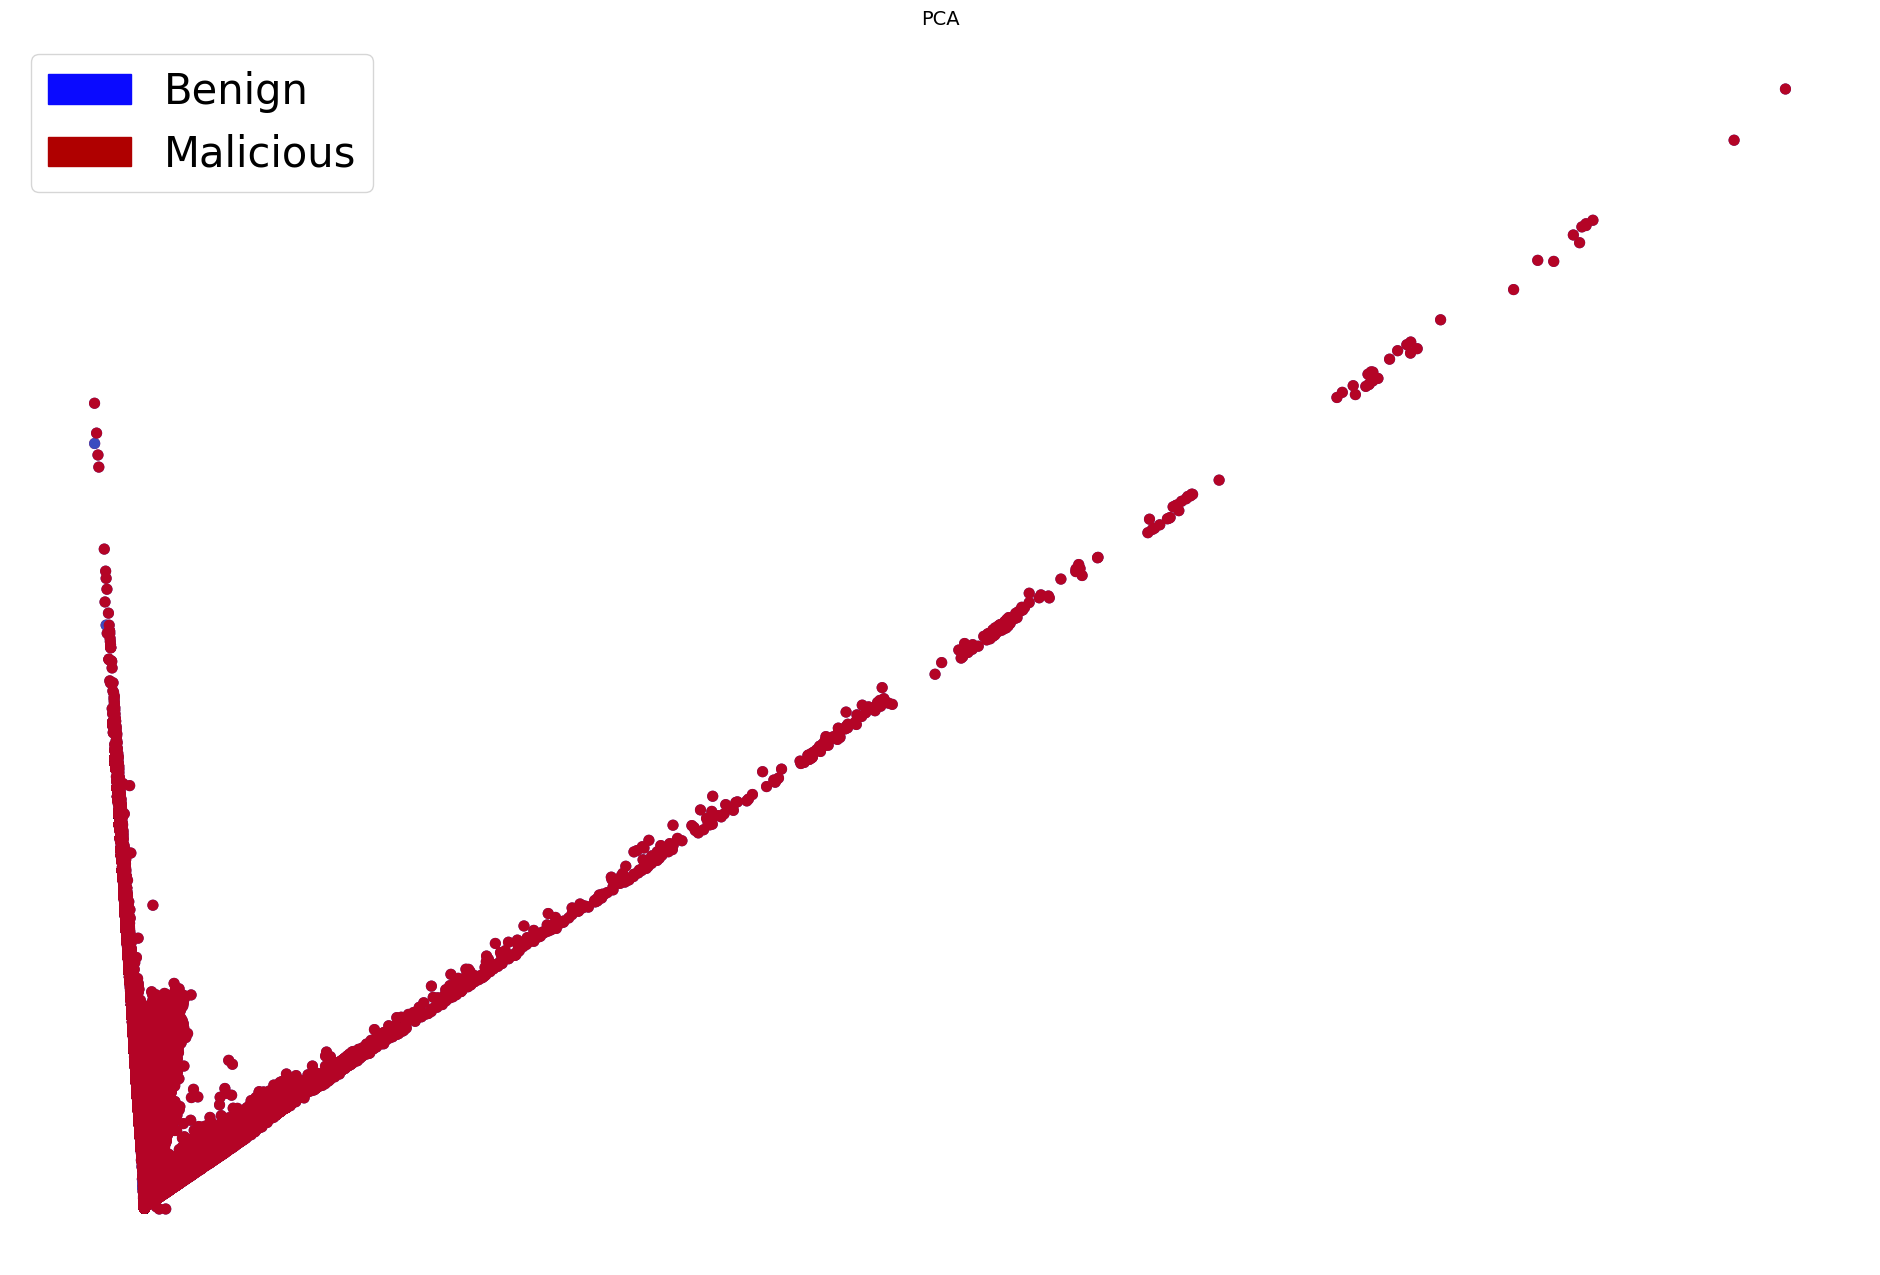

In [19]:
f, ax = plt.subplots(figsize=(24,16))

blue_patch = mpatches.Patch(color='#0A0AFF', label='Benign')
red_patch = mpatches.Patch(color='#AF0000', label='Malicious')

blue_patch = mpatches.Patch(color='#0A0AFF', label='Benign')
red_patch = mpatches.Patch(color='#AF0000', label='Malicious')

cmap = 'Purples'

ax.scatter(X_embedded[:,0], X_embedded[:,1], c=(y == 0), cmap='coolwarm', label='Benign', linewidths=2)
ax.scatter(X_embedded[:,0], X_embedded[:,1], c=(y == 1), cmap='coolwarm', label='Malicious', linewidths=2)
ax.set_title('PCA', fontsize=14)

ax.grid(False)
ax.axis('off')

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])

ax.legend(handles=[blue_patch, red_patch], fontsize=30)

In [20]:
X_embedded_3d = PCA(n_components = 3, random_state = 0).fit_transform(X)

In [21]:
pd.DataFrame(X_embedded_3d).to_csv('PCA_initial_3d.csv', sep=',')
X_embedded_3d = np.array(pd.read_csv('PCA_initial_3d.csv', sep=',').drop(columns=['Unnamed: 0']))

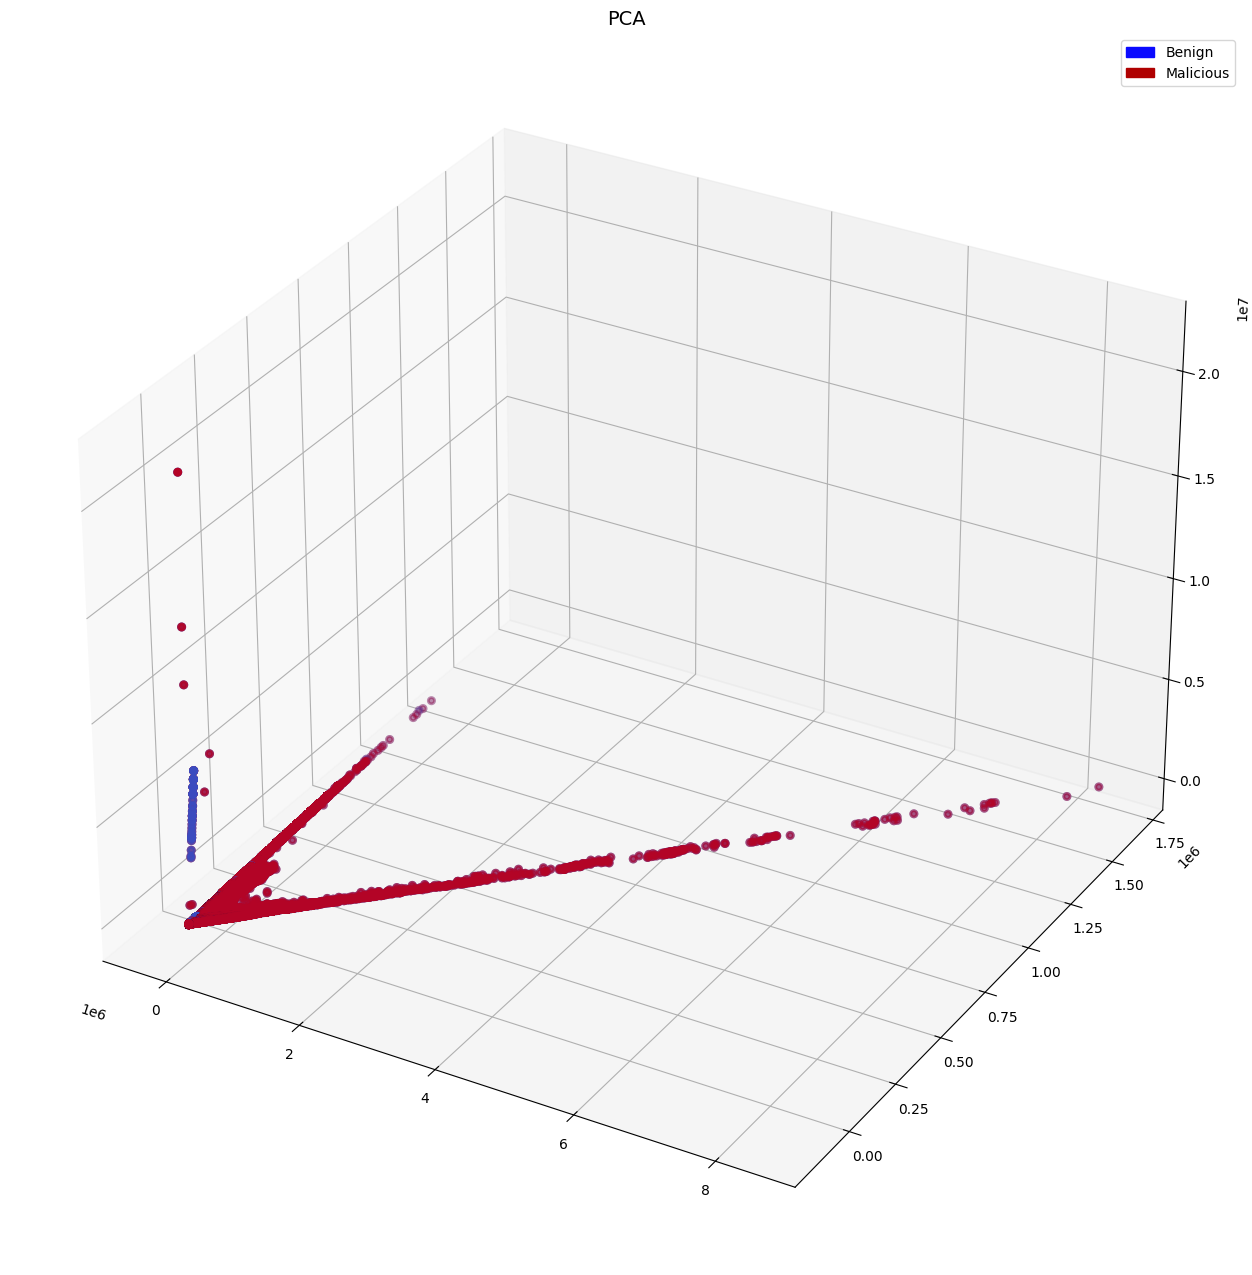

In [22]:
fig = plt.figure(figsize = (24,16))
ax = fig.add_subplot(111, projection='3d')

blue_patch = mpatches.Patch(color='#0A0AFF', label='Benign')
red_patch = mpatches.Patch(color='#AF0000', label='Malicious')

ax.scatter(X_embedded_3d[:,0], X_embedded_3d[:,1], X_embedded_3d[:,2], c=(y == 0), cmap= 'coolwarm', label='Benign', linewidths=2)
ax.scatter(X_embedded_3d[:,0], X_embedded_3d[:,1], X_embedded_3d[:,2], c=(y == 1), cmap='coolwarm', label='Malicious', linewidths=2)
ax.set_title('PCA', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

## Undersampling

Undersampling the dataset is a vital step. Not only is the data slightly imbalanced, but a method such as cluster centroids allows for outlier elimination as well as clearer visualization with unsupervised learning methods such as t-SNE.

In [23]:
cluster_centroids = ClusterCentroids(random_state = 42)
X_undersam, y_underSam = cluster_centroids.fit_resample(X, y)

In [24]:
X_undersam.to_csv('Under-Sampled-Data-features.csv', header = True)
y_underSam.to_csv('Under-Sampled-Data-labels.csv', header = True)

X_undersam_saved = pd.read_csv('Under-Sampled-Data-features.csv', sep=',').drop(columns=['Unnamed: 0'])
y_underSam_saved = pd.read_csv('Under-Sampled-Data-labels.csv', sep=',').drop(columns=['Unnamed: 0'])['Label']

## t-SNE (After undersampling)

After undersampling, t-SNE was applied once more, and yielded both 2D and 3D visualizations that showed some clear separations in both the benign and malicious data.

In [25]:
X_res_embedded = TSNE(n_components = 2, random_state = 0).fit_transform(X_undersam_saved)

In [26]:
pd.DataFrame(X_res_embedded).to_csv('tSNE_undersampled_2D.csv', sep=',')
X_res_embedded_saved = np.array(pd.read_csv('tSNE_undersampled_2D.csv', sep=',').drop(columns=['Unnamed: 0']))

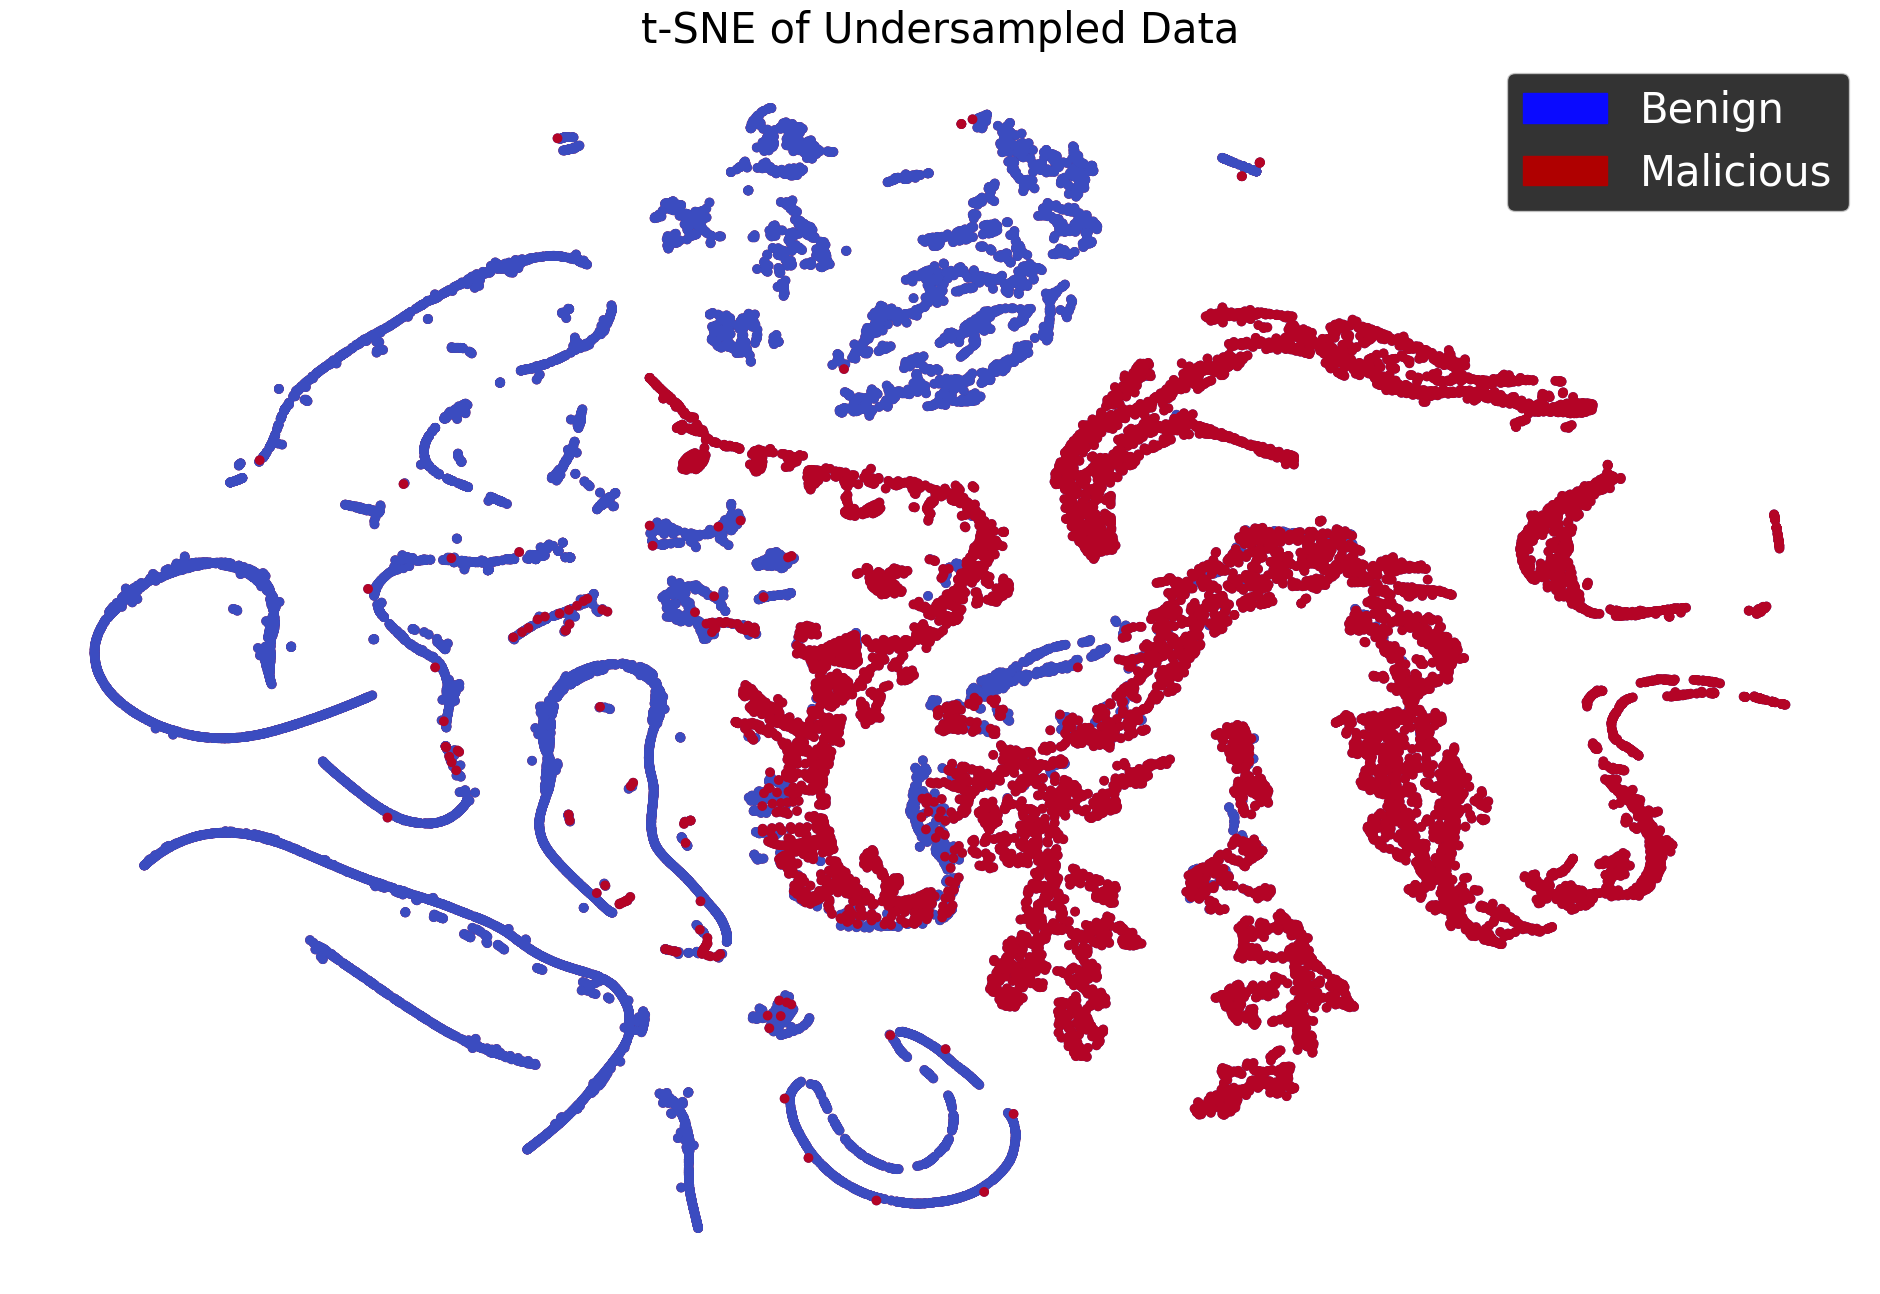

In [27]:
f, ax = plt.subplots(figsize=(24,16))
plt.style.use('dark_background')

blue_patch = mpatches.Patch(color='#0A0AFF', label='Benign')
red_patch = mpatches.Patch(color='#AF0000', label='Malicious')

ax.scatter(X_res_embedded_saved[:,0], X_res_embedded_saved[:,1], c=(y_underSam_saved == 0), cmap='coolwarm', label='Benign', linewidths=1)
ax.scatter(X_res_embedded_saved[:,0], X_res_embedded_saved[:,1], c=(y_underSam_saved == 1), cmap='coolwarm', label='Malicious', linewidths=1)
ax.set_title('t-SNE of Undersampled Data', fontsize=30)

ax.grid(False)

ax.axis('off')

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])

plt.legend(loc=2, prop={'size': 20})

ax.legend(handles=[blue_patch, red_patch], fontsize=30)

In [28]:
X_res_embedded_3d = TSNE(n_components = 3, random_state = 0).fit_transform(X_undersam_saved)

In [29]:
pd.DataFrame(X_res_embedded_3d).to_csv('tSNE_3d_undersampled.csv', sep=',')
X_res_embedded_3d_saved = np.array(pd.read_csv('tSNE_3d_undersampled.csv', sep=',').drop(columns=['Unnamed: 0']))

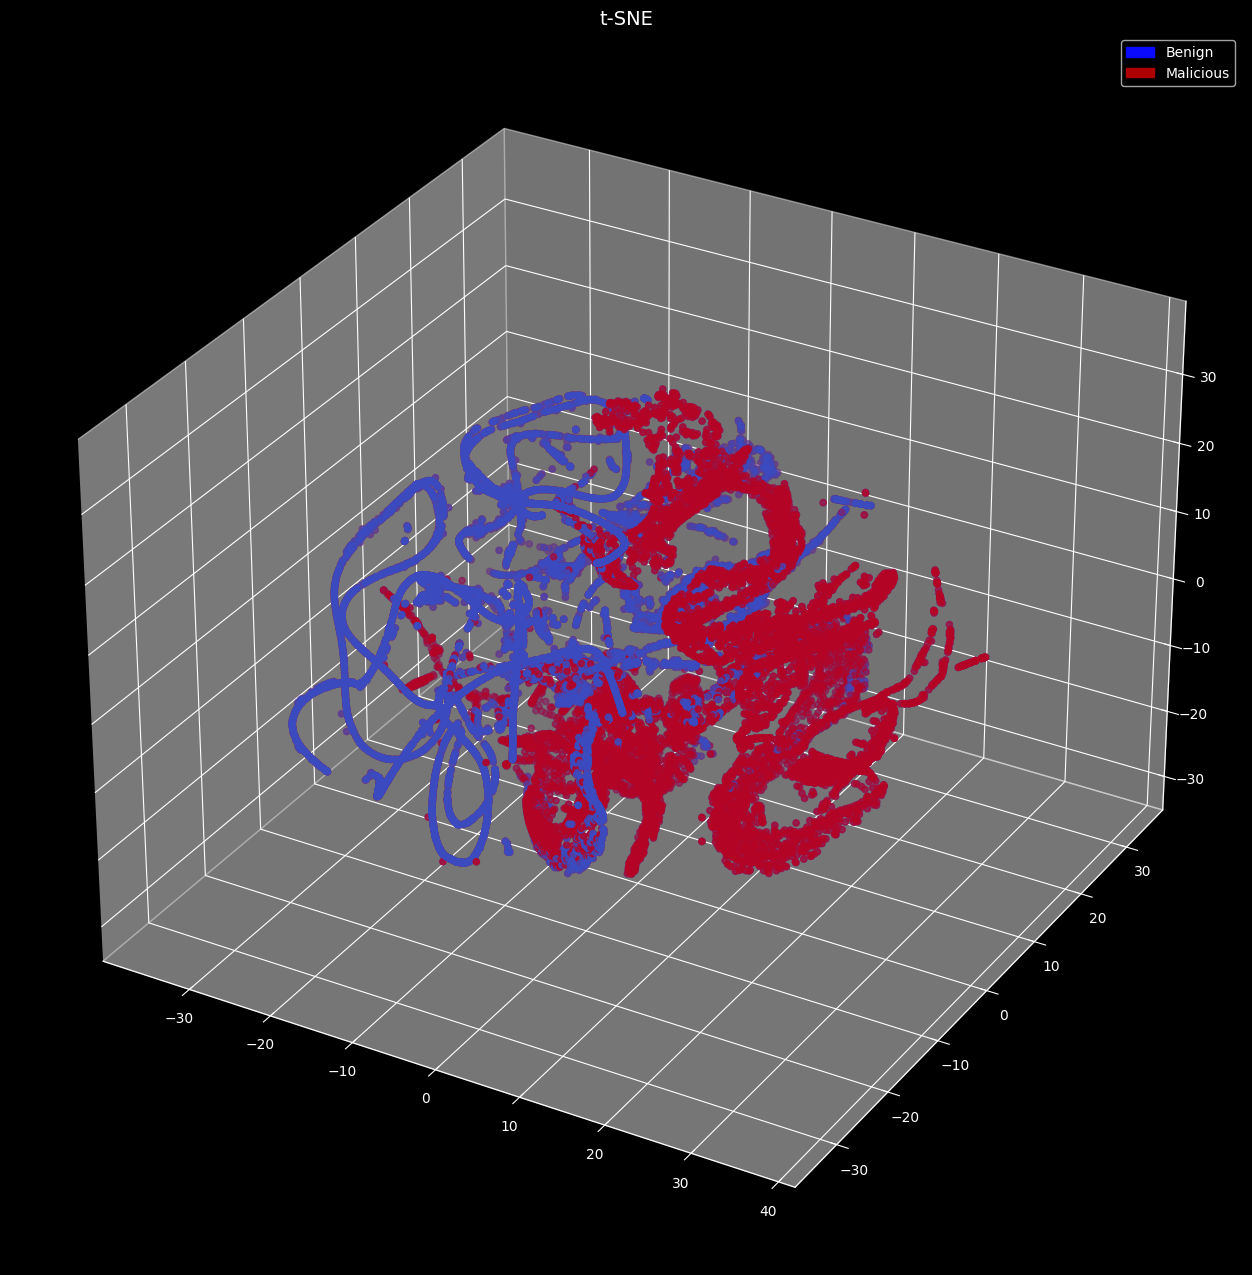

In [30]:
fig = plt.figure(figsize = (24,16))
ax = fig.add_subplot(111, projection='3d')

blue_patch = mpatches.Patch(color='#0A0AFF', label='Benign')
red_patch = mpatches.Patch(color='#AF0000', label='Malicious')

ax.scatter(X_res_embedded_3d_saved[:,0], X_res_embedded_3d_saved[:,1], X_res_embedded_3d_saved[:,2], c=(y_underSam_saved == 0), cmap= 'coolwarm', label='Benign', linewidths=1)
ax.scatter(X_res_embedded_3d_saved[:,0], X_res_embedded_3d_saved[:,1], X_res_embedded_3d_saved[:,2], c=(y_underSam_saved == 1), cmap='coolwarm', label='Malicious', linewidths=1)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

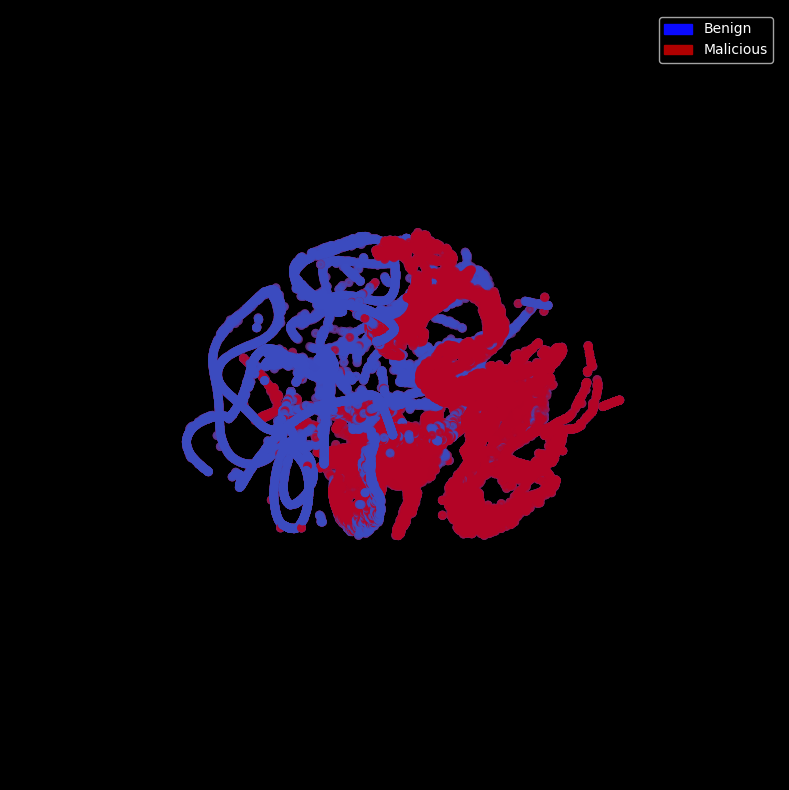

In [31]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.grid(False)
ax.set_axis_off()

blue_patch = mpatches.Patch(color='#0A0AFF', label='Benign')
red_patch = mpatches.Patch(color='#AF0000', label='Malicious')

def init():
    ax.scatter(X_res_embedded_3d_saved[:,0], X_res_embedded_3d_saved[:,1], X_res_embedded_3d_saved[:,2], c=(y_underSam_saved == 0), cmap= 'coolwarm', label='Benign', linewidths=2)
    ax.scatter(X_res_embedded_3d_saved[:,0], X_res_embedded_3d_saved[:,1], X_res_embedded_3d_saved[:,2], c=(y_underSam_saved == 1), cmap='coolwarm', label='Malicious', linewidths=2)
    ax.legend(handles=[blue_patch, red_patch])
    
    ax.grid(True)

    # Hide axes ticks
    ax.set_xticks([])
    ax.set_yticks([])

    return fig,

def animate(i):
    ax.view_init(elev=30., azim=3.6*i)
    return fig,

# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=100, blit=True)

plt.show()

In [32]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=120, metadata=dict(artist='Krishnendu'), bitrate=30000)
ani.save('tSNE Demo.mp4', writer=writer) 

## PCA (After undersampling)

After undersampling, PCA was applied once more, and yielded both 2D and 3D visualizations that showed some clear separations in both the benign and malicious data.

In [33]:
X_res_embedded = PCA(n_components = 2, random_state = 0).fit_transform(X_undersam_saved)

In [34]:
pd.DataFrame(X_res_embedded).to_csv('PCA_undersampled_2D.csv', sep=',')
X_res_embedded_saved = np.array(pd.read_csv('PCA_undersampled_2D.csv', sep=',').drop(columns=['Unnamed: 0']))

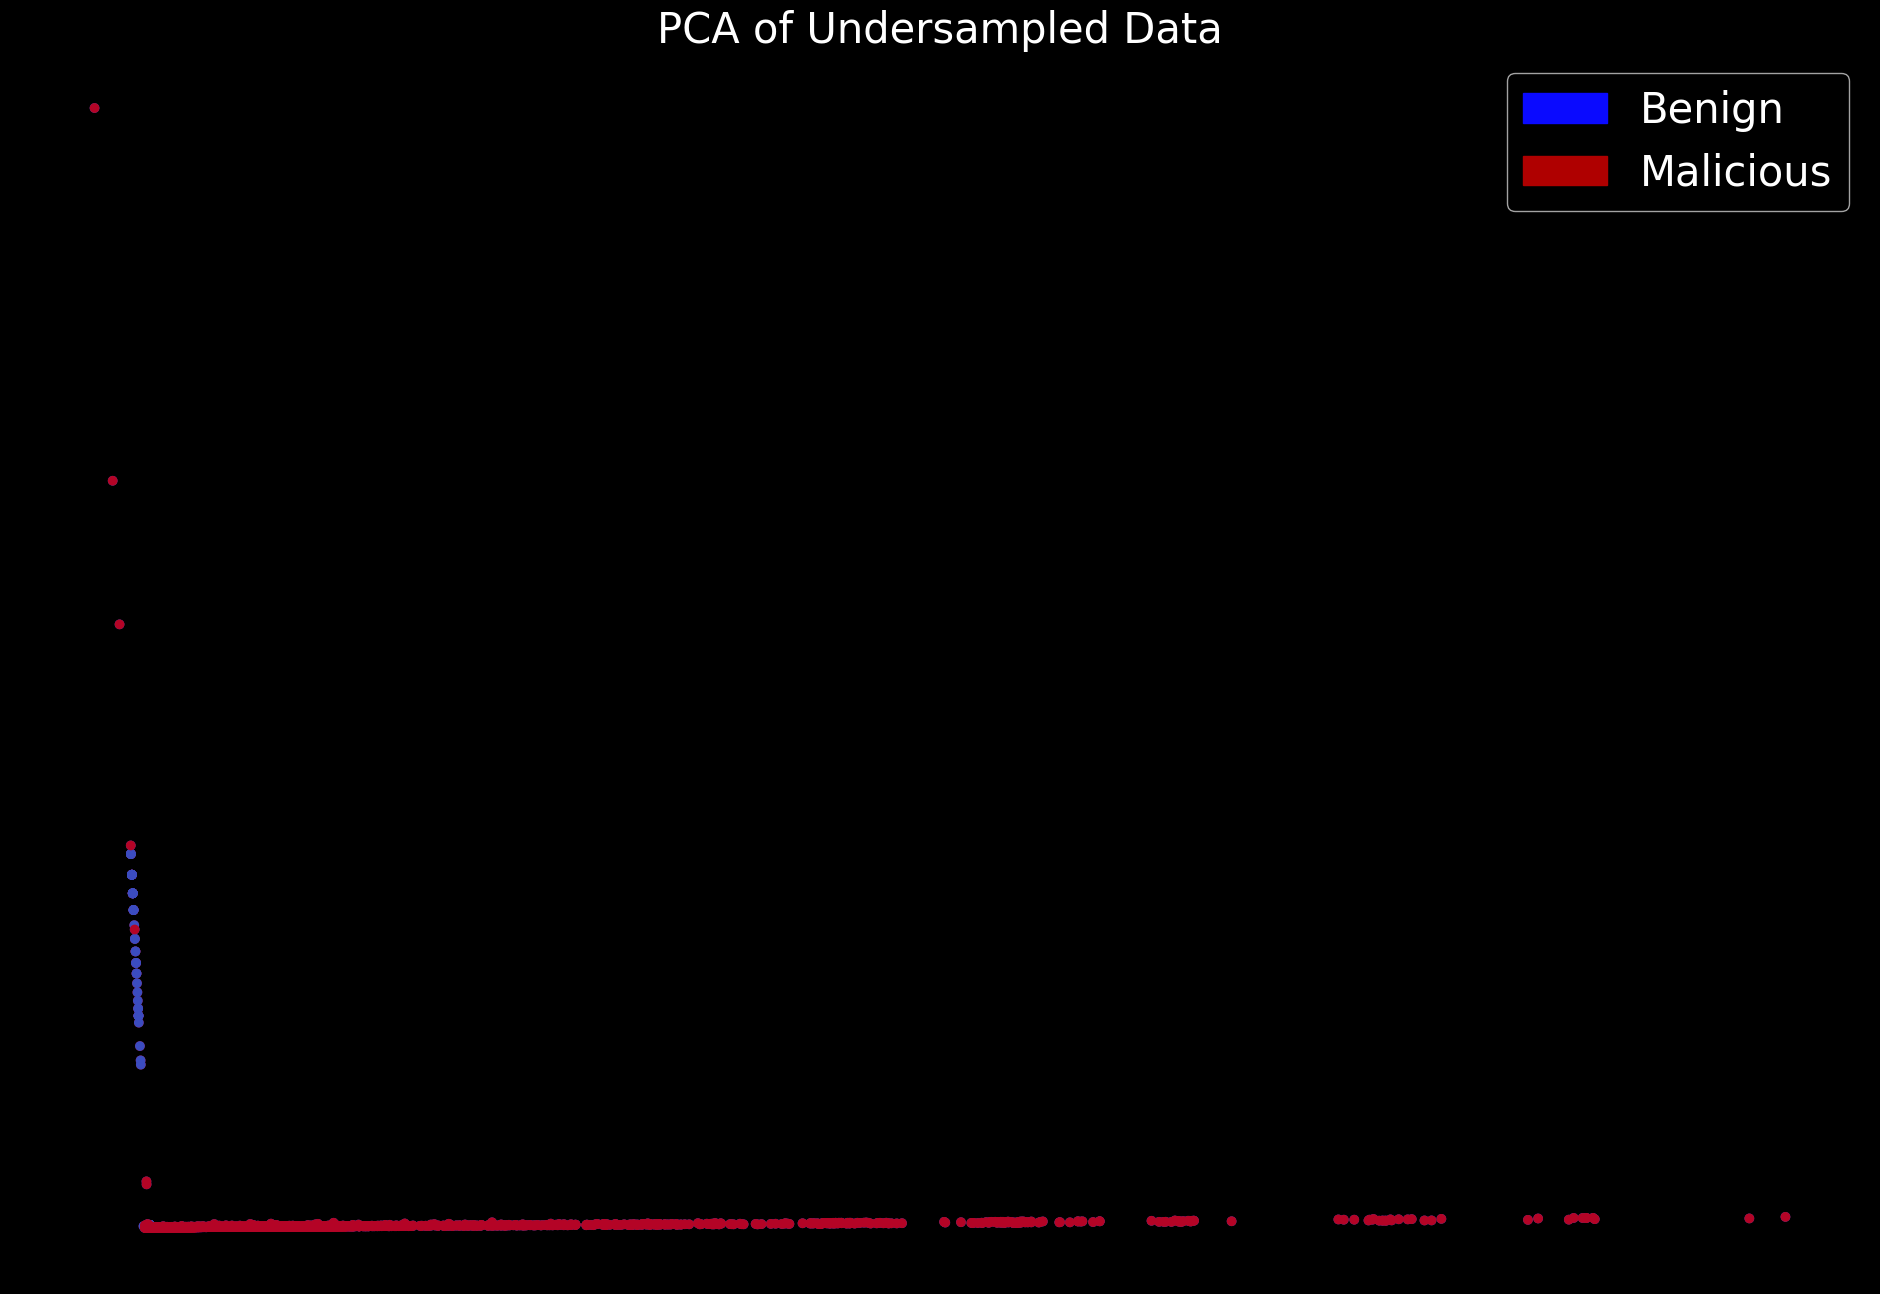

In [35]:
f, ax = plt.subplots(figsize=(24,16))
plt.style.use('dark_background')

blue_patch = mpatches.Patch(color='#0A0AFF', label='Benign')
red_patch = mpatches.Patch(color='#AF0000', label='Malicious')

ax.scatter(X_res_embedded_saved[:,0], X_res_embedded_saved[:,1], c=(y_underSam_saved == 0), cmap='coolwarm', label='Benign', linewidths=1)
ax.scatter(X_res_embedded_saved[:,0], X_res_embedded_saved[:,1], c=(y_underSam_saved == 1), cmap='coolwarm', label='Malicious', linewidths=1)
ax.set_title('PCA of Undersampled Data', fontsize=30)

ax.grid(False)

ax.axis('off')

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])

plt.legend(loc=2, prop={'size': 20})

ax.legend(handles=[blue_patch, red_patch], fontsize=30)

In [36]:
X_res_embedded_3d = PCA(n_components = 3, random_state = 0).fit_transform(X_undersam_saved)

In [37]:
pd.DataFrame(X_res_embedded_3d).to_csv('PCA_3d_undersampled.csv', sep=',')
X_res_embedded_3d_saved = np.array(pd.read_csv('PCA_3d_undersampled.csv', sep=',').drop(columns=['Unnamed: 0']))

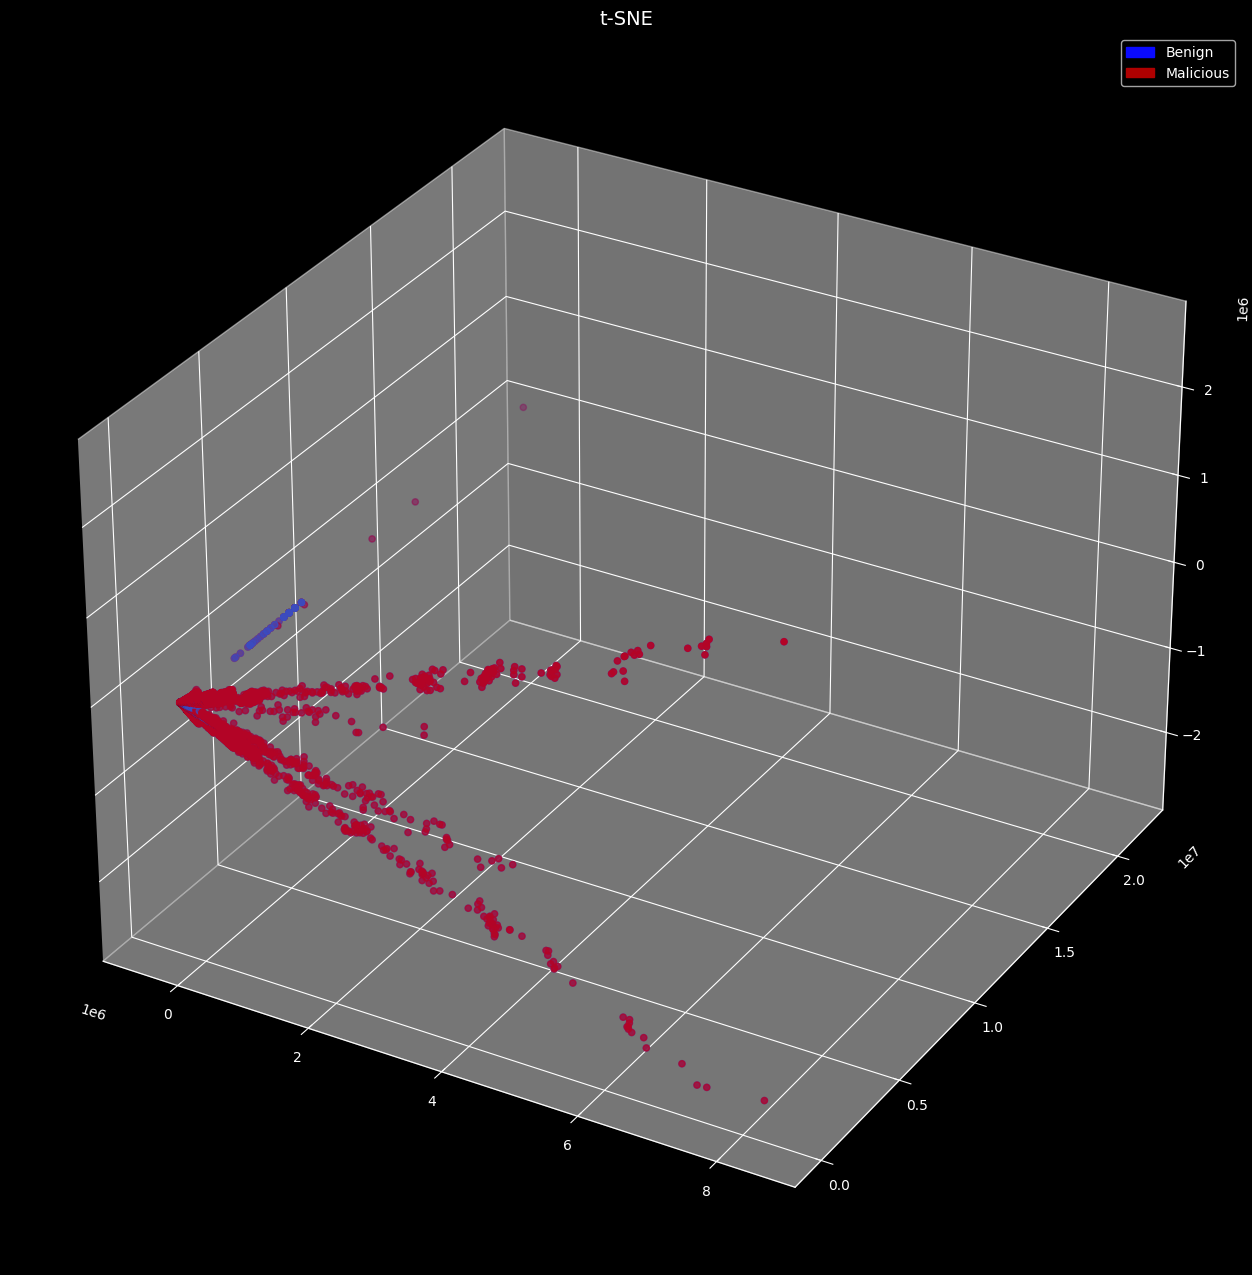

In [38]:
fig = plt.figure(figsize = (24,16))
ax = fig.add_subplot(111, projection='3d')

blue_patch = mpatches.Patch(color='#0A0AFF', label='Benign')
red_patch = mpatches.Patch(color='#AF0000', label='Malicious')

ax.scatter(X_res_embedded_3d_saved[:,0], X_res_embedded_3d_saved[:,1], X_res_embedded_3d_saved[:,2], c=(y_underSam_saved == 0), cmap= 'coolwarm', label='Benign', linewidths=1)
ax.scatter(X_res_embedded_3d_saved[:,0], X_res_embedded_3d_saved[:,1], X_res_embedded_3d_saved[:,2], c=(y_underSam_saved == 1), cmap='coolwarm', label='Malicious', linewidths=1)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

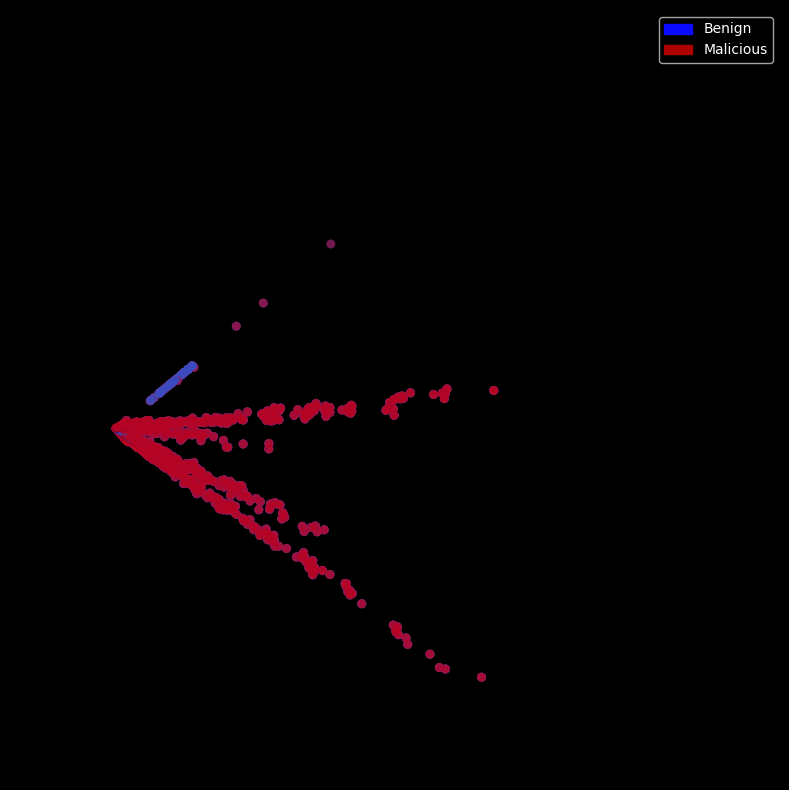

In [39]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.grid(False)
ax.set_axis_off()

blue_patch = mpatches.Patch(color='#0A0AFF', label='Benign')
red_patch = mpatches.Patch(color='#AF0000', label='Malicious')

def init():
    ax.scatter(X_res_embedded_3d_saved[:,0], X_res_embedded_3d_saved[:,1], X_res_embedded_3d_saved[:,2], c=(y_underSam_saved == 0), cmap= 'coolwarm', label='Benign', linewidths=2)
    ax.scatter(X_res_embedded_3d_saved[:,0], X_res_embedded_3d_saved[:,1], X_res_embedded_3d_saved[:,2], c=(y_underSam_saved == 1), cmap='coolwarm', label='Malicious', linewidths=2)
    ax.legend(handles=[blue_patch, red_patch])
    
    ax.grid(True)

    # Hide axes ticks
    ax.set_xticks([])
    ax.set_yticks([])

    return fig,

def animate(i):
    ax.view_init(elev=30., azim=3.6*i)
    return fig,

# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=100, blit=True)

plt.show()

In [40]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=120, metadata=dict(artist='Krishnendu'), bitrate=30000)
ani.save('PCA Demo.mp4', writer=writer) 

## Standerdize

An important step for improving the classification is simply to standerdize this data.  

In [41]:
scaler = StandardScaler()
X_undersam_saved_normalized = scaler.fit_transform(X_undersam_saved)
X_undersam_saved_normalized = pd.DataFrame(X_undersam_saved_normalized, columns=X_undersam_saved.columns)

# Feature selection

In order to provide the most optimal results that require the least number of, and most descriptive, features, the pearson correlation matrix was utilized for feature selection. 

## Pearson Correlation Matrix

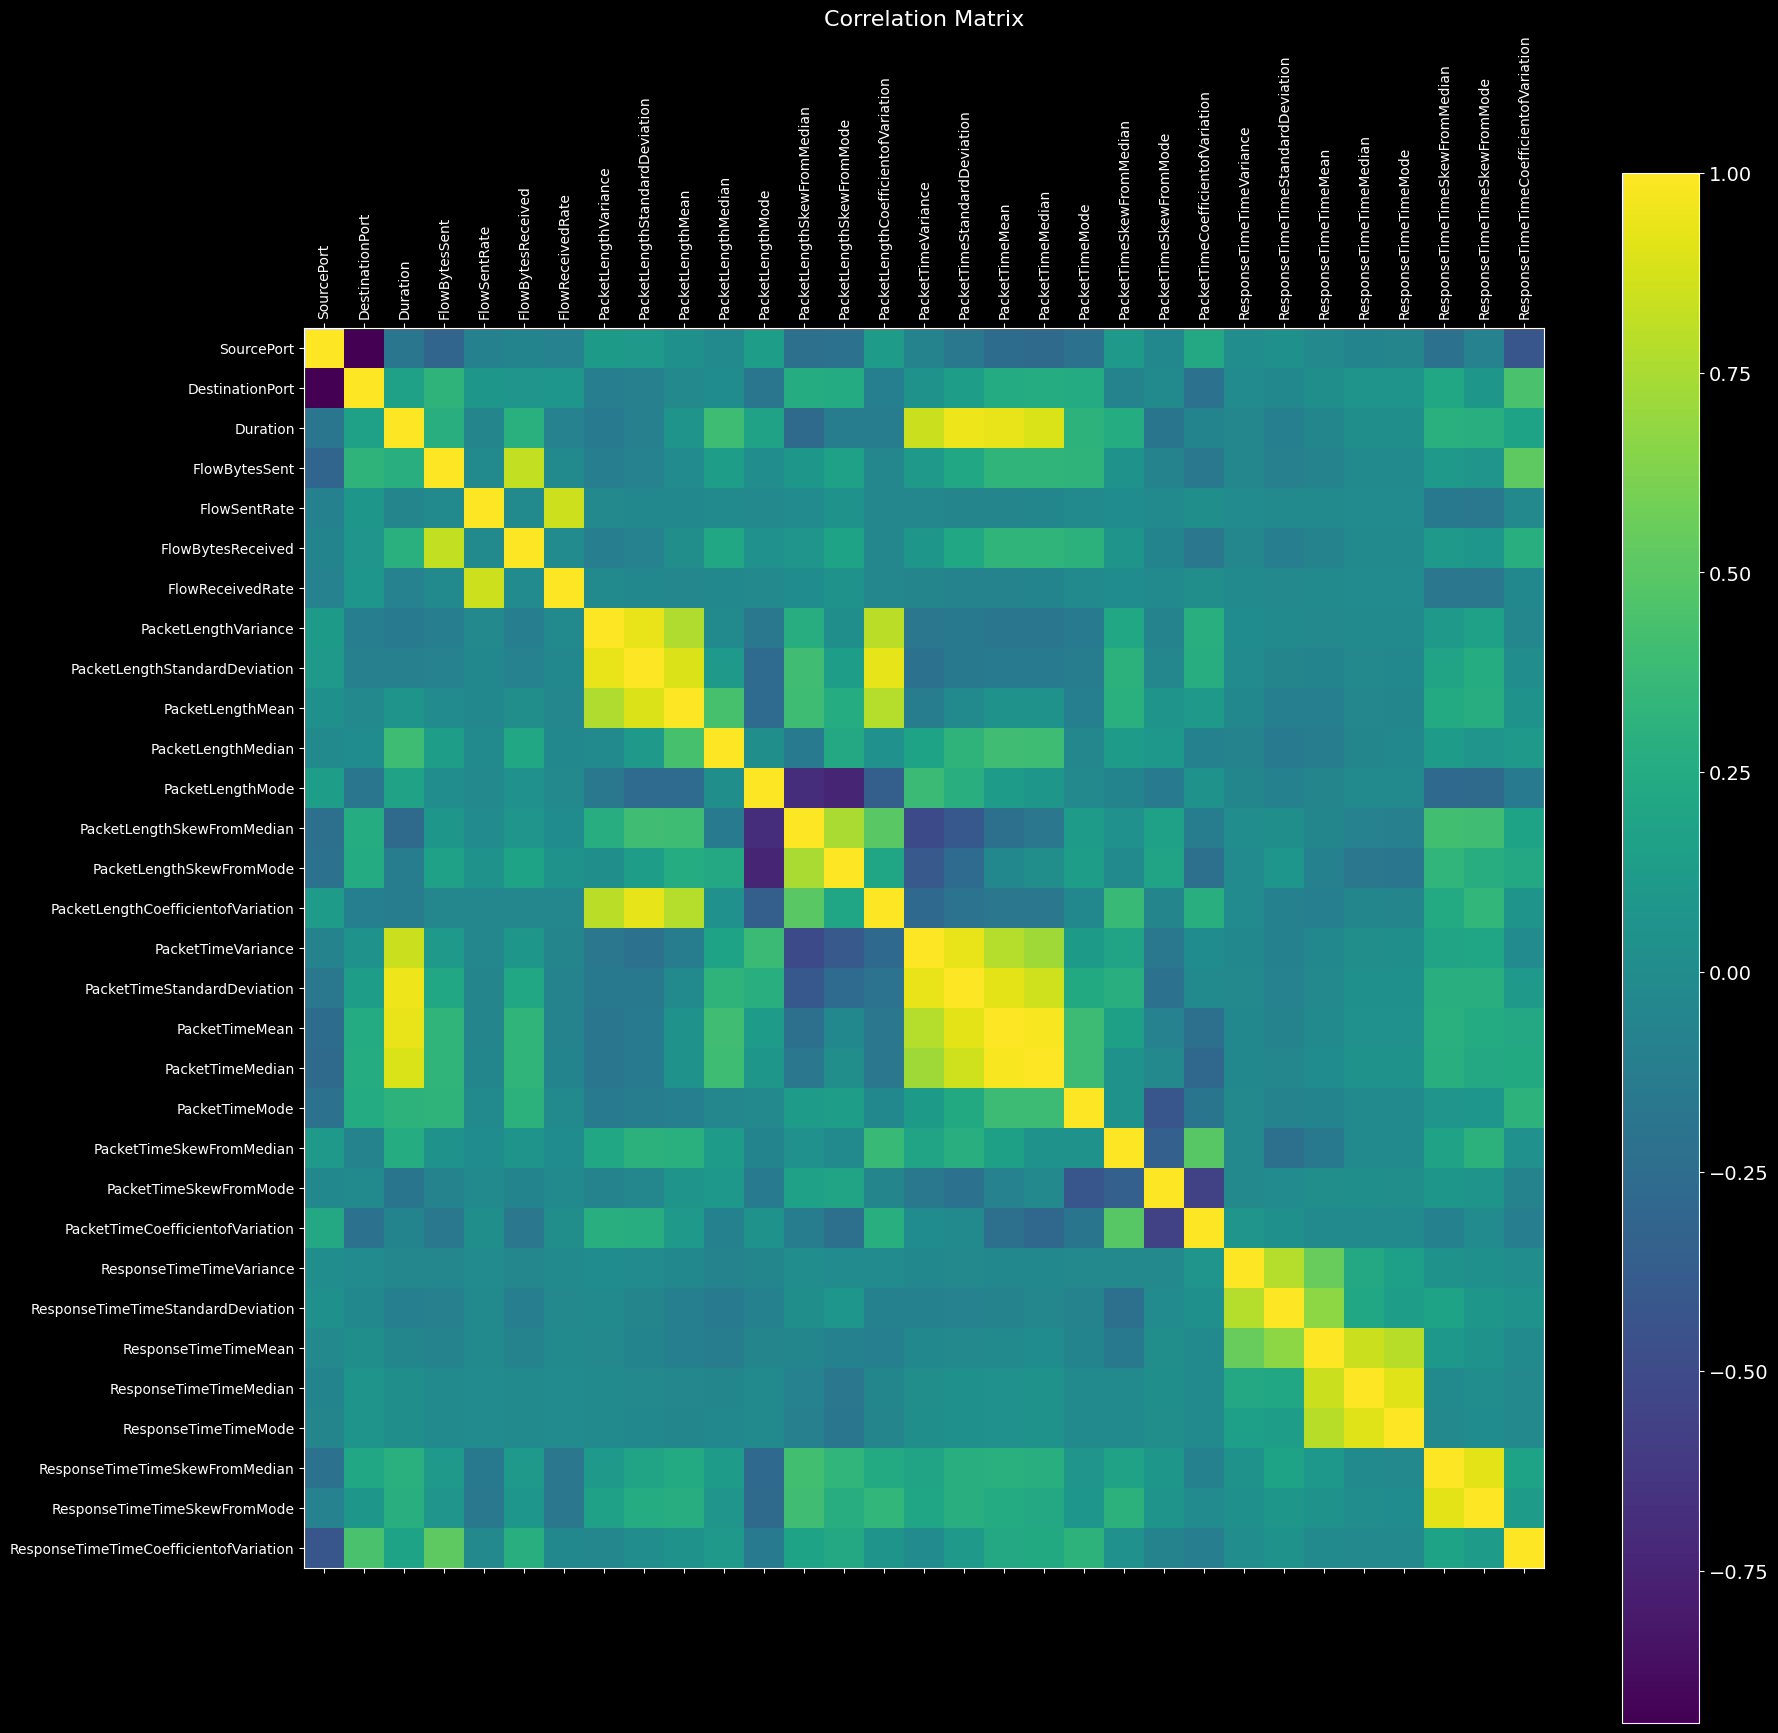

In [42]:
f = plt.figure(figsize = (20,20))
plt.matshow(X_undersam_saved_normalized.corr('pearson'), f.number)
plt.xticks(range(X_undersam_saved_normalized.shape[1]), X_undersam_saved_normalized.columns, fontsize=10, rotation=90)
plt.yticks(range(X_undersam_saved_normalized.shape[1]), X_undersam_saved_normalized.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show() 

In [43]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X_undersam_saved_normalized, y_underSam_saved, 10)
print(str(len(cor_feature)), 'selected features')
print(' ')
print(cor_feature)

10 selected features
 
['FlowBytesSent', 'FlowBytesReceived', 'PacketLengthVariance', 'Duration', 'PacketTimeMean', 'PacketTimeMedian', 'PacketLengthMedian', 'PacketLengthStandardDeviation', 'PacketLengthCoefficientofVariation', 'PacketLengthMean']


## Chi Squared

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(abs(X_undersam_saved_normalized), y_underSam_saved)
chi_support = chi_selector.get_support()
chi_feature = X_undersam_saved_normalized.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

print(' ')
print(chi_feature)

10 selected features
 
['PacketLengthMedian', 'PacketLengthMode', 'PacketLengthSkewFromMedian', 'PacketLengthSkewFromMode', 'PacketTimeVariance', 'PacketTimeMode', 'PacketTimeSkewFromMedian', 'ResponseTimeTimeStandardDeviation', 'ResponseTimeTimeSkewFromMedian', 'ResponseTimeTimeSkewFromMode']


## Features To Keep 

With regard to the correlation matrix, the following features were selection to remain in the training dataset. 

In [45]:
X_features_kept = X_undersam_saved_normalized[cor_feature]

In [46]:
from IPython.display import HTML, display

def set_background(color):    
    script = (
        "var cell = this.closest('.jp-CodeCell');"
        "var editor = cell.querySelector('.jp-Editor');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)"
    ).format(color)
    
    display(HTML('<img src onerror="{}" style="display:none">'.format(script)))
    
print(X_features_kept.head(5))

   FlowBytesSent  FlowBytesReceived  PacketLengthVariance  Duration  \
0      -0.214843          -0.226068             -0.410442  0.653119   
1      -0.141812          -0.141410             -0.385021  1.142196   
2      -0.269360          -0.290072             -0.411928  1.117930   
3      -0.215580          -0.215687             -0.401712  0.930092   
4      -0.165417          -0.199057             -0.405516 -0.080675   

   PacketTimeMean  PacketTimeMedian  PacketLengthMedian  \
0        0.713276          0.861557           -0.295253   
1        0.988992          0.862264           -0.028446   
2        0.913721          0.525805           -0.584295   
3        0.966310          0.344263           -0.028446   
4        0.383847          0.899114           -0.028446   

   PacketLengthStandardDeviation  PacketLengthCoefficientofVariation  \
0                      -0.410832                           -0.249000   
1                      -0.320425                           -0.086542   
2 

## t-SNE (After undersampling and feature selection)

In [47]:
X_res_embedded = TSNE(n_components = 2, random_state = 0).fit_transform(X_features_kept)

In [48]:
pd.DataFrame(X_res_embedded).to_csv('tsne_feature_selection_1.csv', sep=',')
X_res_embedded_fs = np.array(pd.read_csv('tsne_feature_selection_1.csv', sep=',').drop(columns=['Unnamed: 0']))

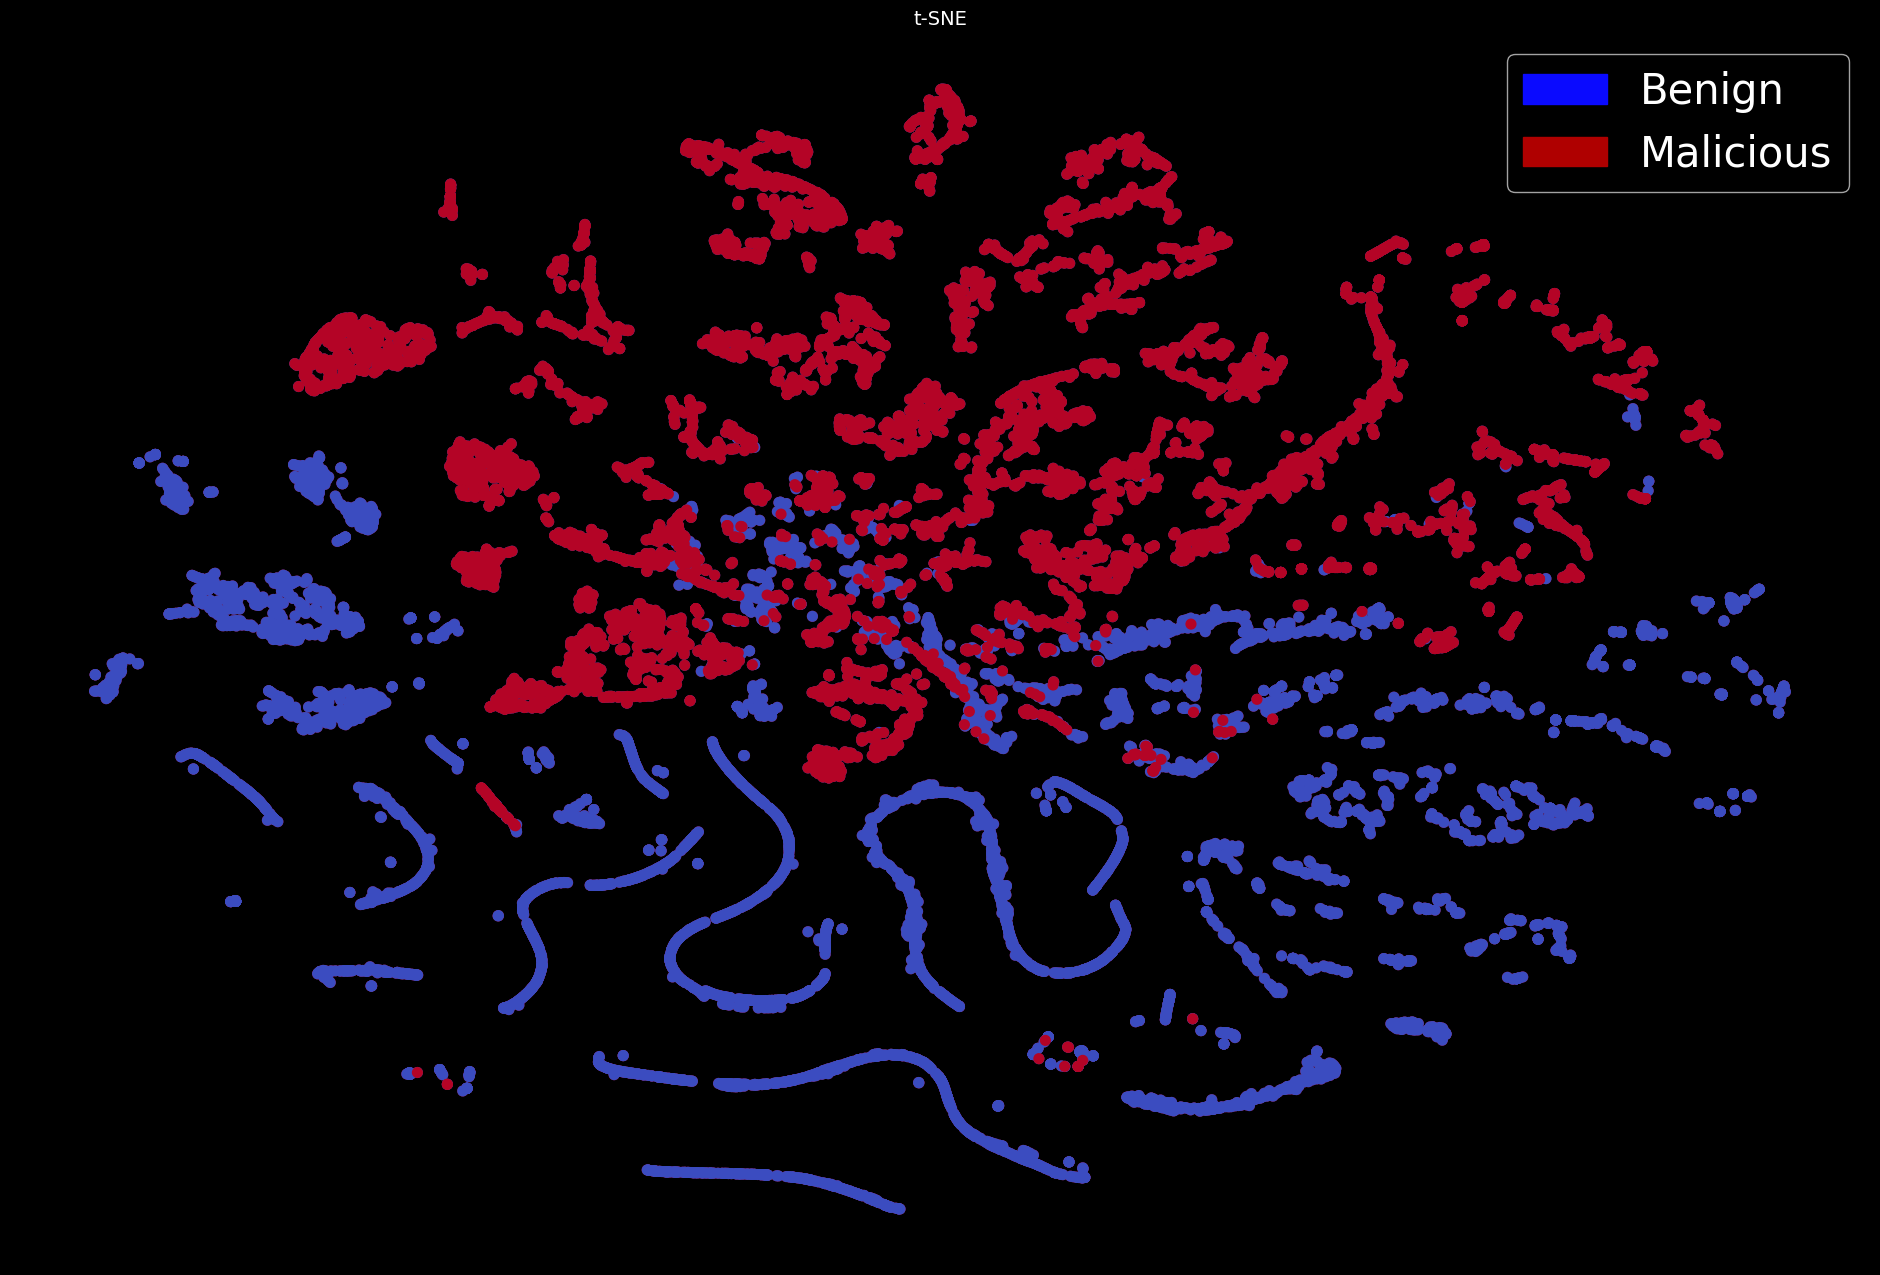

In [49]:
f, ax = plt.subplots(figsize=(24,16))

blue_patch = mpatches.Patch(color='#0A0AFF', label='Benign')
red_patch = mpatches.Patch(color='#AF0000', label='Malicious')

ax.scatter(X_res_embedded_fs[:,0], X_res_embedded_fs[:,1], c=(y_underSam_saved == 0), cmap='coolwarm', label='Benign', linewidths=2)
ax.scatter(X_res_embedded_fs[:,0], X_res_embedded_fs[:,1], c=(y_underSam_saved == 1), cmap='coolwarm', label='Malicious', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(False)

ax.axis('off')

ax.set_xticks([])
ax.set_yticks([])

ax.legend(handles=[blue_patch, red_patch], fontsize=30)

In [50]:
X_res_embedded_3d_fs = TSNE(n_components = 3, random_state = 0).fit_transform(X_features_kept)

In [51]:
pd.DataFrame(X_res_embedded_3d_fs).to_csv('tsne_feature_selection_2.csv', sep=',')
X_res_embedded_3d_fs_saved = np.array(
    pd.read_csv('tsne_feature_selection_2.csv', sep=',').drop(columns=['Unnamed: 0']))

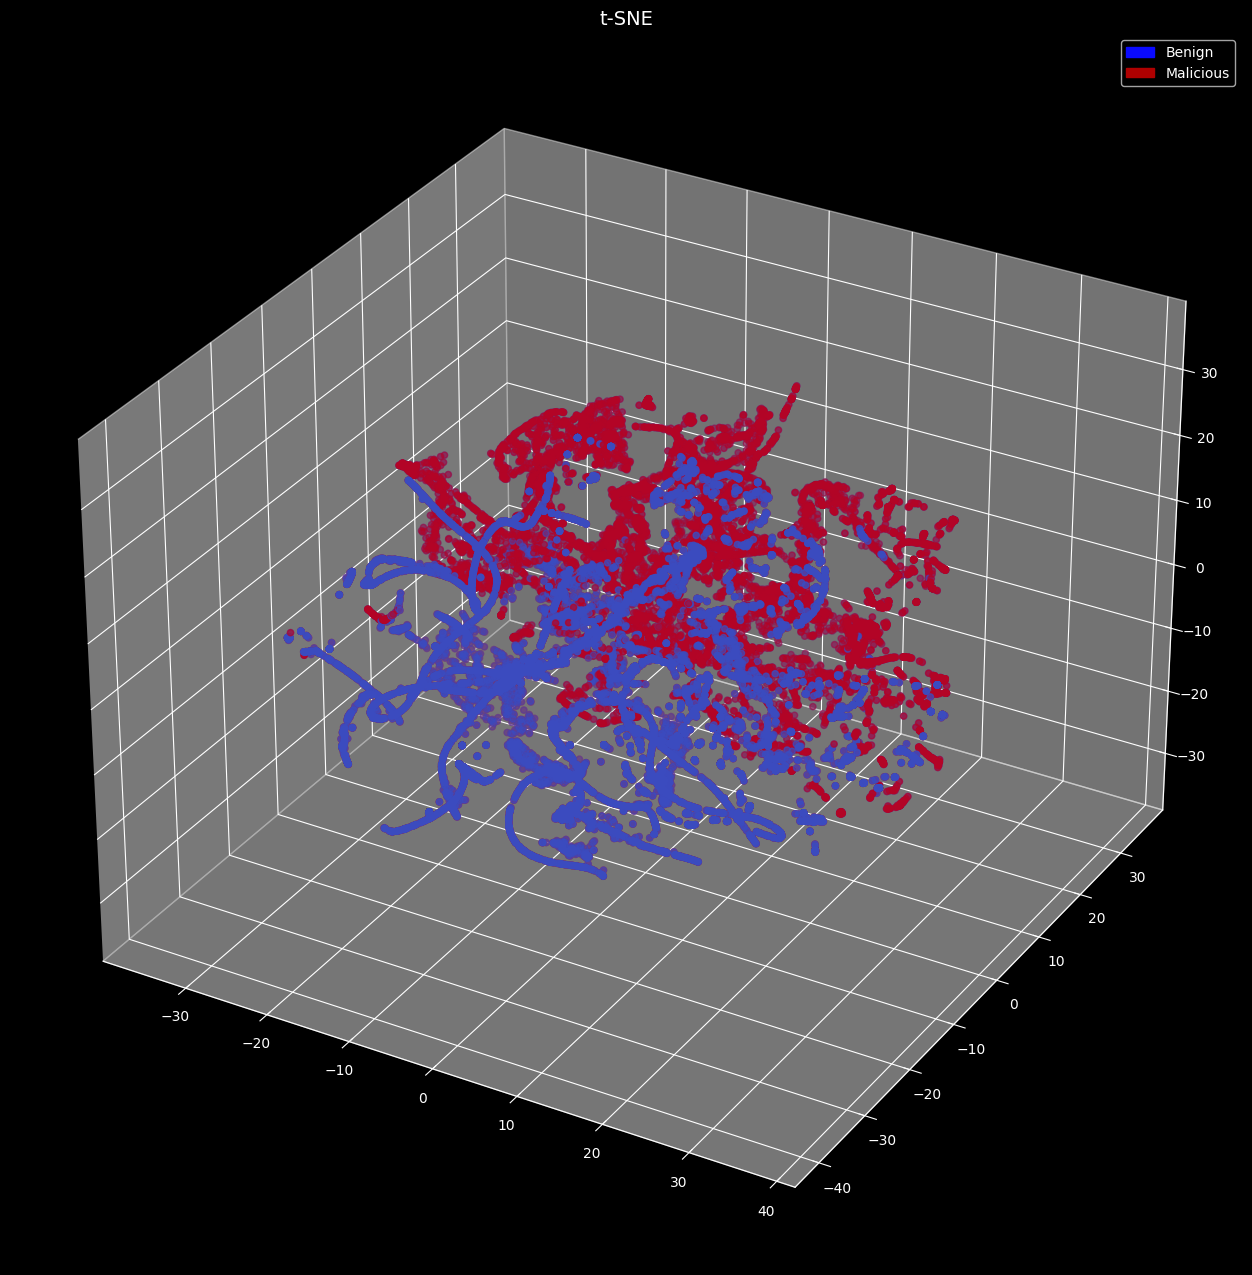

In [52]:
fig = plt.figure(figsize = (24,16))
ax = fig.add_subplot(111, projection='3d')

blue_patch = mpatches.Patch(color='#0A0AFF', label='Benign')
red_patch = mpatches.Patch(color='#AF0000', label='Malicious')

ax.scatter(X_res_embedded_3d_fs_saved[:,0], X_res_embedded_3d_fs_saved[:,1], 
           X_res_embedded_3d_fs_saved[:,2], c=(y_underSam_saved == 0), 
           cmap= 'coolwarm', label='Benign', linewidths=1)
ax.scatter(X_res_embedded_3d_fs_saved[:,0], X_res_embedded_3d_fs_saved[:,1], 
           X_res_embedded_3d_fs_saved[:,2], c=(y_underSam_saved == 1), 
           cmap='coolwarm', label='Malicious', linewidths=1)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

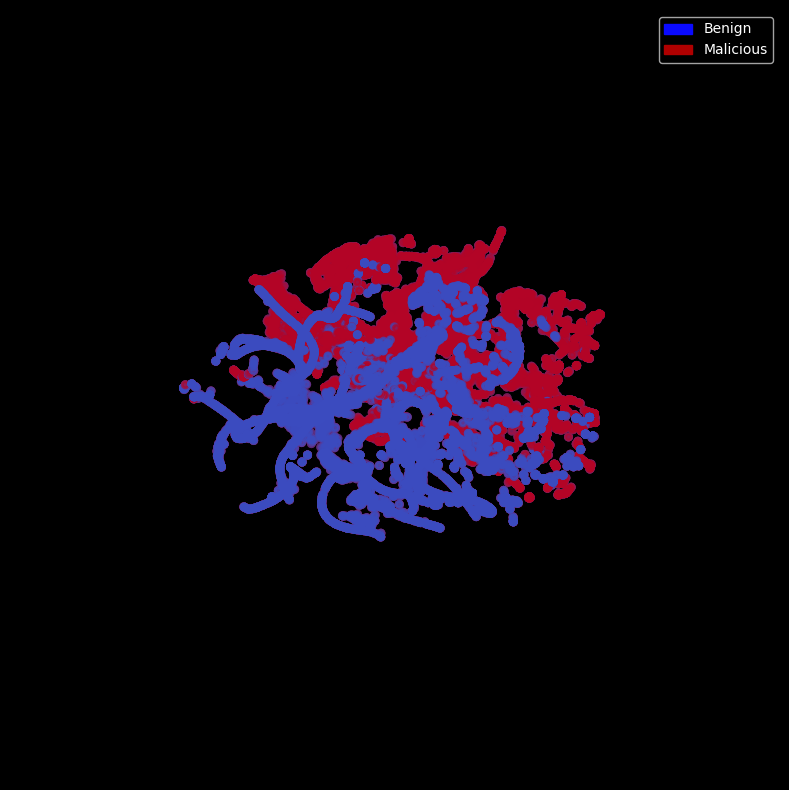

In [53]:
fig = plt.figure(figsize = (15,10))

plt.style.use('dark_background')

ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.grid(False)
ax.set_axis_off()

blue_patch = mpatches.Patch(color='#0A0AFF', label='Benign')
red_patch = mpatches.Patch(color='#AF0000', label='Malicious')

def init():
    ax.scatter(X_res_embedded_3d_fs_saved[:,0], X_res_embedded_3d_fs_saved[:,1], X_res_embedded_3d_fs_saved[:,2], c=(y_underSam_saved == 0), cmap= 'coolwarm', label='Benign', linewidths=2)
    ax.scatter(X_res_embedded_3d_fs_saved[:,0], X_res_embedded_3d_fs_saved[:,1], X_res_embedded_3d_fs_saved[:,2], c=(y_underSam_saved == 1), cmap='coolwarm', label='Malicious', linewidths=2)
    ax.legend(handles=[blue_patch, red_patch])
    
    ax.grid(True)

    # Hide axes ticks
    ax.set_xticks([])
    ax.set_yticks([])

    return fig,

def animate(i):
    ax.view_init(elev=30., azim=3.6*i)
    return fig,

# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=100, blit=True)    

plt.show()

In [54]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=120, metadata=dict(artist='Krishnendu'), bitrate=30000)
ani.save('tSNE Undersampling Demo.mp4', writer=writer) 

## PCA (After undersampling and feature selection)

In [55]:
X_res_embedded = PCA(n_components = 2, random_state = 0).fit_transform(X_features_kept)

In [56]:
pd.DataFrame(X_res_embedded).to_csv('PCA_feature_selection_1.csv', sep=',')
X_res_embedded_fs = np.array(pd.read_csv('PCA_feature_selection_1.csv', sep=',').drop(columns=['Unnamed: 0']))

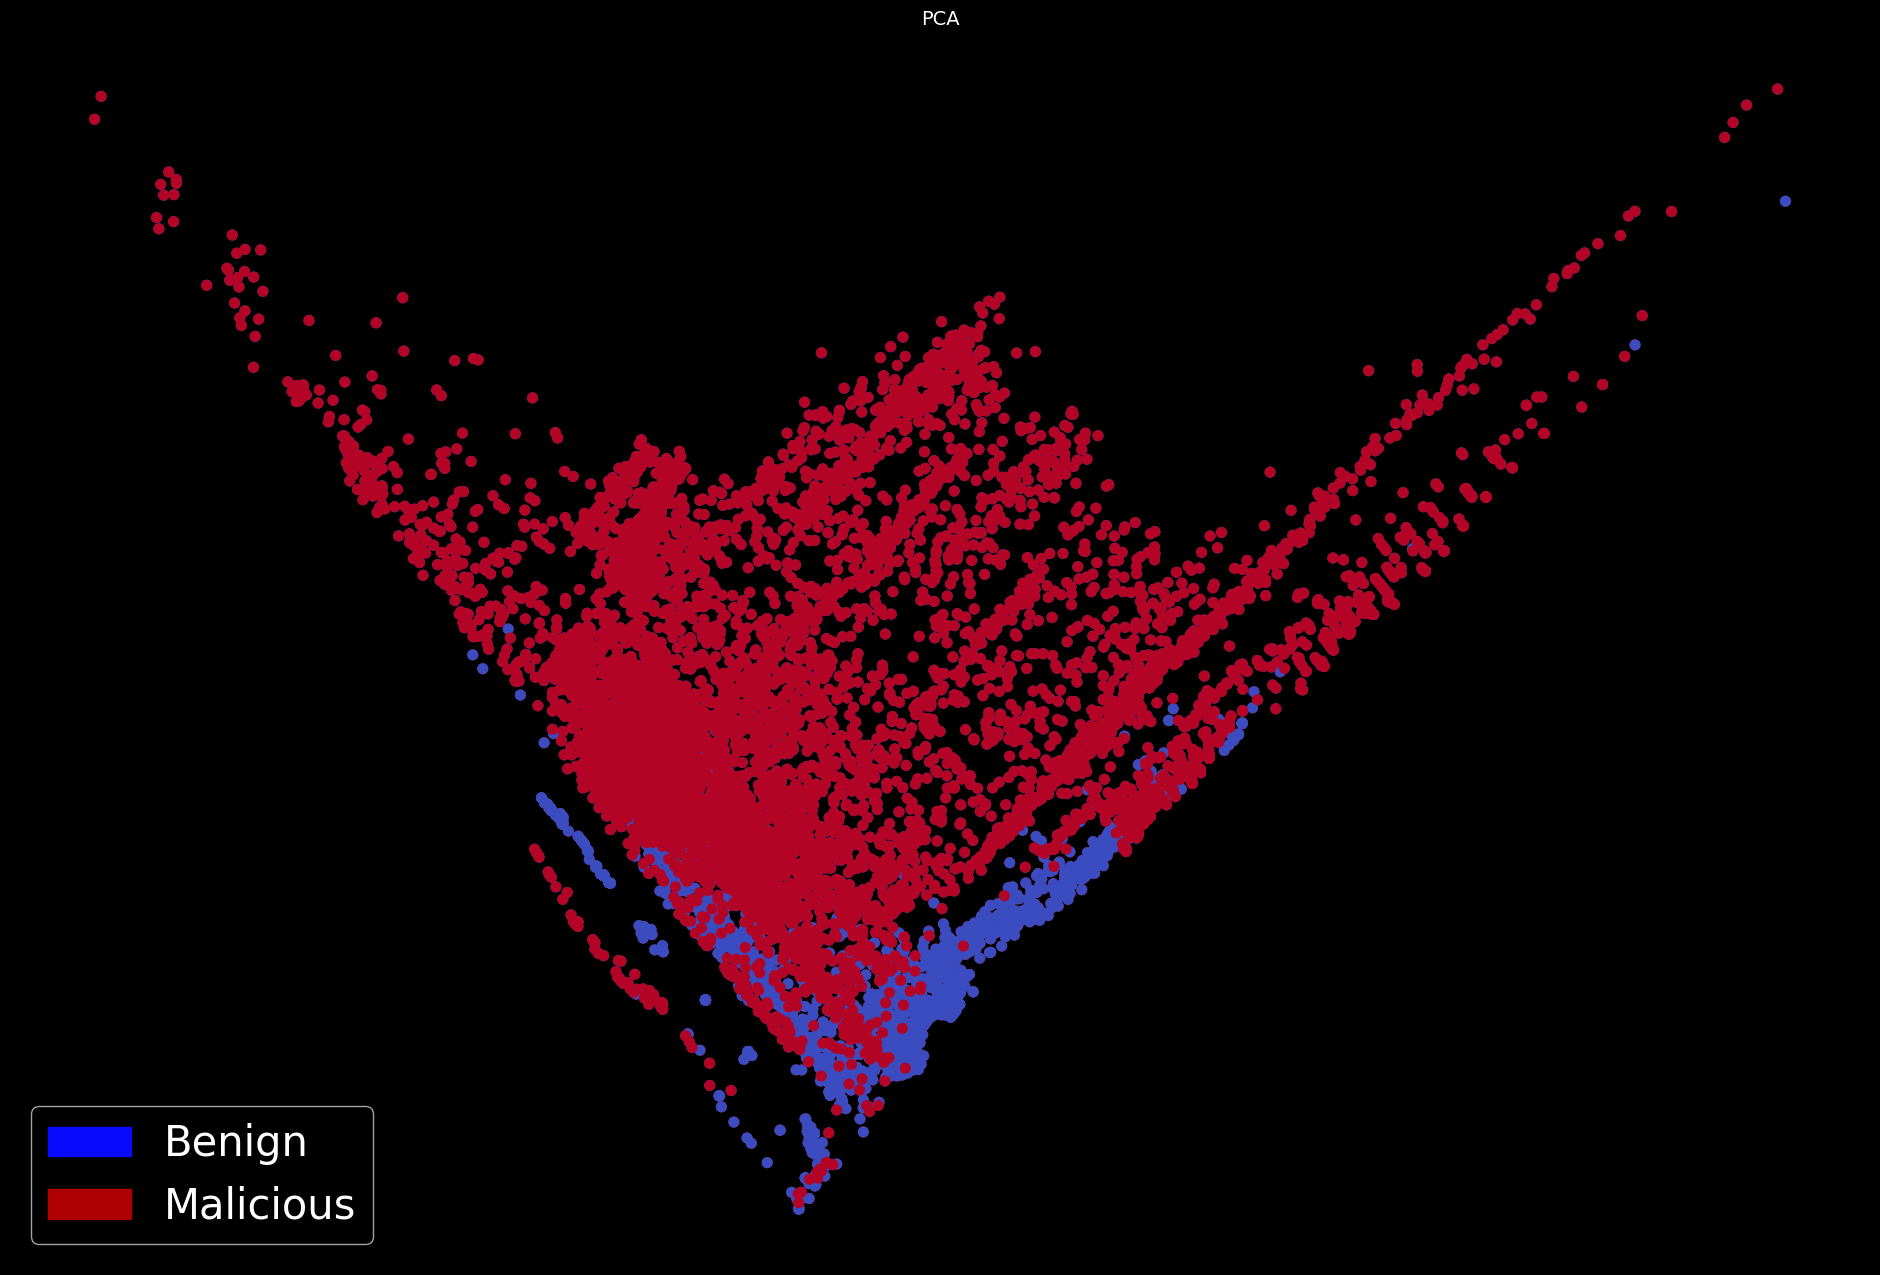

In [57]:
f, ax = plt.subplots(figsize=(24,16))

blue_patch = mpatches.Patch(color='#0A0AFF', label='Benign')
red_patch = mpatches.Patch(color='#AF0000', label='Malicious')

ax.scatter(X_res_embedded_fs[:,0], X_res_embedded_fs[:,1], c=(y_underSam_saved == 0), cmap='coolwarm', label='Benign', linewidths=2)
ax.scatter(X_res_embedded_fs[:,0], X_res_embedded_fs[:,1], c=(y_underSam_saved == 1), cmap='coolwarm', label='Malicious', linewidths=2)
ax.set_title('PCA', fontsize=14)

ax.grid(False)

ax.axis('off')

ax.set_xticks([])
ax.set_yticks([])

ax.legend(handles=[blue_patch, red_patch], fontsize=30)

In [58]:
X_res_embedded_3d_fs = PCA(n_components = 3, random_state = 0).fit_transform(X_features_kept)

In [59]:
pd.DataFrame(X_res_embedded_3d_fs).to_csv('PCA_feature_selection_2.csv', sep=',')
X_res_embedded_3d_fs_saved = np.array(
    pd.read_csv('PCA_feature_selection_2.csv', sep=',').drop(columns=['Unnamed: 0']))

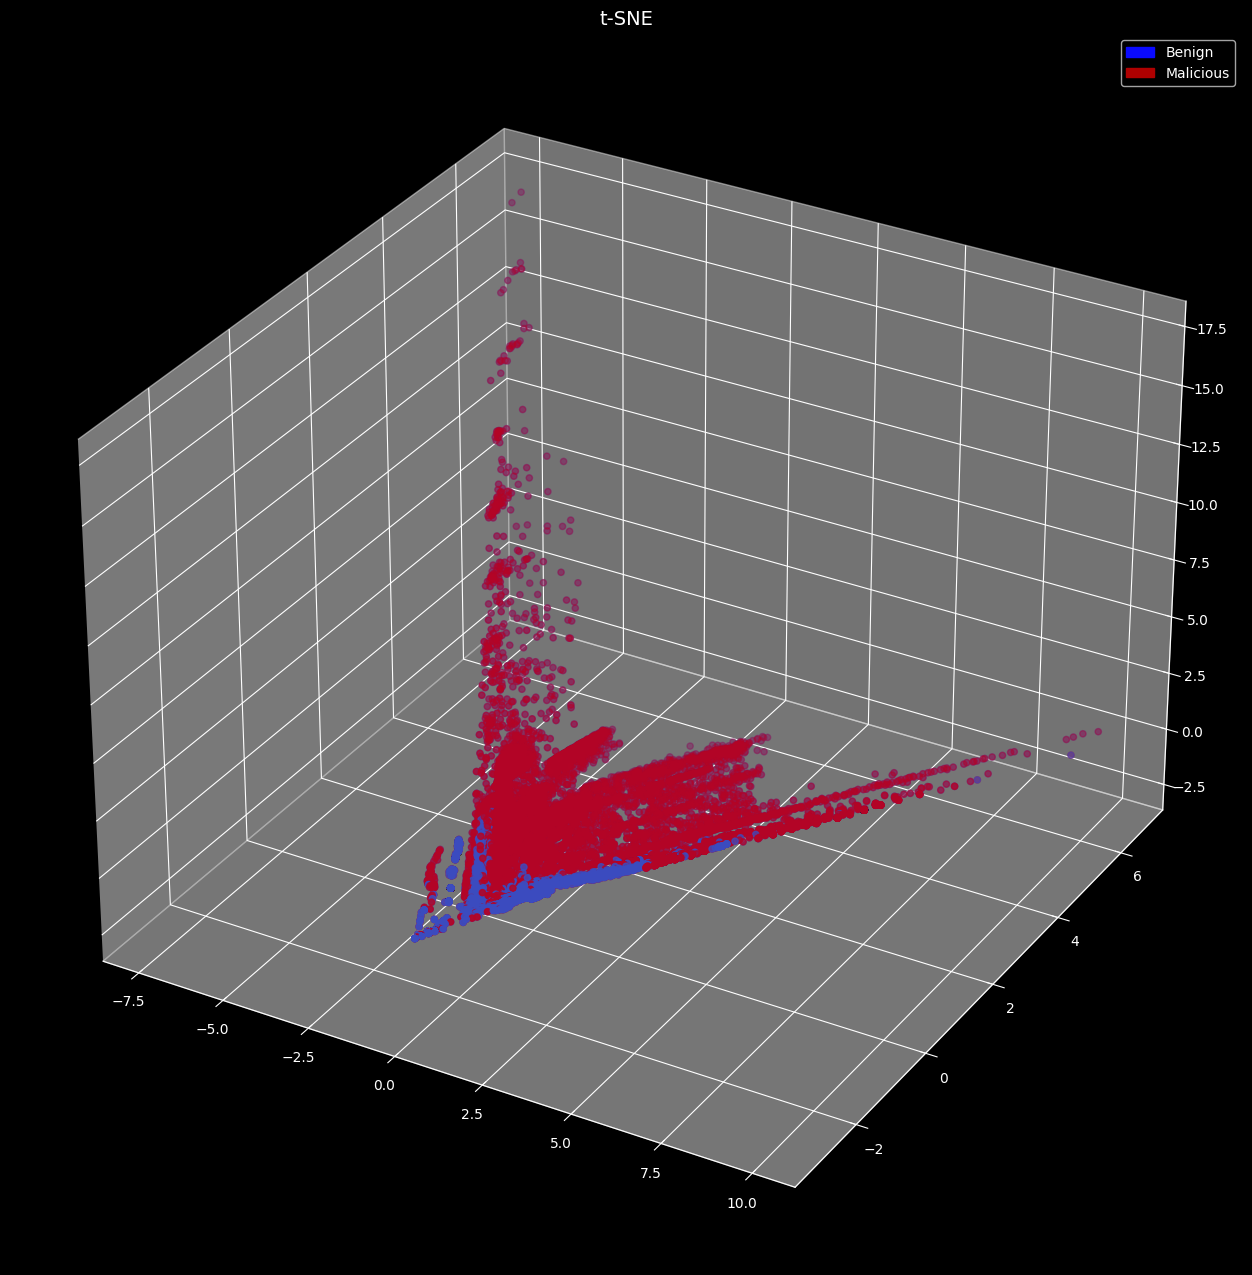

In [60]:
fig = plt.figure(figsize = (24,16))
ax = fig.add_subplot(111, projection='3d')

blue_patch = mpatches.Patch(color='#0A0AFF', label='Benign')
red_patch = mpatches.Patch(color='#AF0000', label='Malicious')

ax.scatter(X_res_embedded_3d_fs_saved[:,0], X_res_embedded_3d_fs_saved[:,1], 
           X_res_embedded_3d_fs_saved[:,2], c=(y_underSam_saved == 0), 
           cmap= 'coolwarm', label='Benign', linewidths=1)
ax.scatter(X_res_embedded_3d_fs_saved[:,0], X_res_embedded_3d_fs_saved[:,1], 
           X_res_embedded_3d_fs_saved[:,2], c=(y_underSam_saved == 1), 
           cmap='coolwarm', label='Malicious', linewidths=1)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

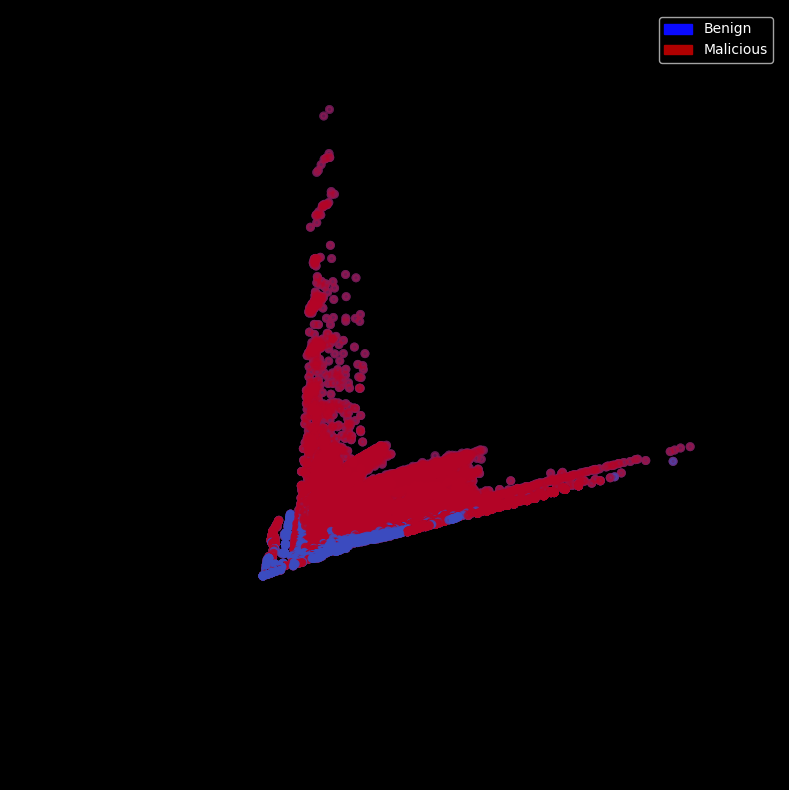

In [61]:
fig = plt.figure(figsize = (15,10))

plt.style.use('dark_background')

ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.grid(False)
ax.set_axis_off()

blue_patch = mpatches.Patch(color='#0A0AFF', label='Benign')
red_patch = mpatches.Patch(color='#AF0000', label='Malicious')

def init():
    ax.scatter(X_res_embedded_3d_fs_saved[:,0], X_res_embedded_3d_fs_saved[:,1], X_res_embedded_3d_fs_saved[:,2], c=(y_underSam_saved == 0), cmap= 'coolwarm', label='Benign', linewidths=2)
    ax.scatter(X_res_embedded_3d_fs_saved[:,0], X_res_embedded_3d_fs_saved[:,1], X_res_embedded_3d_fs_saved[:,2], c=(y_underSam_saved == 1), cmap='coolwarm', label='Malicious', linewidths=2)
    ax.legend(handles=[blue_patch, red_patch])
    
    ax.grid(True)

    # Hide axes ticks
    ax.set_xticks([])
    ax.set_yticks([])

    return fig,

def animate(i):
    ax.view_init(elev=30., azim=3.6*i)
    return fig,

# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=100, blit=True)    

plt.show()

In [62]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=120, metadata=dict(artist='Krishnendu'), bitrate=30000)
ani.save('PCA Undersampling Demo.mp4', writer=writer) 

# Classifiers

Three classifiers were trained on the data, a Support Vector Machine, a Random Forest Classifier, and an LSTM Neural Network. 

## Train-test-validation-split

The train-test-validation split selected for training the three classifiers is as follows: 

- Train: 67%
- Test: 22%
- Validation: 11%

In [63]:
X_train , X_test , y_train, y_test = train_test_split(X_features_kept, 
                                                      y_underSam_saved, 
                                                      test_size=0.33, 
                                                      random_state=42)

X_valid , X_test , y_valid, y_test = train_test_split(X_test, 
                                                      y_test, 
                                                      test_size=0.66, 
                                                      random_state=42)

## Support Vector Machine

### Acceptable results

The following hyperparameters lead to optimistic results

```python
svm_model = svm.SVC(C=1.0, gamma=1e4, kernel='rbf') ## 0.93
svm_model = svm.SVC(C=1.0, gamma=1e5, kernel='rbf') ## 0.82
svm_model = svm.SVC(C=1.0, gamma=1e6, kernel='rbf') ## 0.76
svm_model = svm.SVC(C=30.0, gamma=1e6, kernel='rbf') ## 0.76

```

In [64]:
# Normalized Data
svm_model = svm.SVC(C=1.0, gamma=1e4, kernel='rbf')

svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [65]:
score = accuracy_score(y_test, y_pred_svm)
print(score)

0.9069179498965755


In [66]:
y_test_pred_svm = svm_model.decision_function(X_test) 

### Plotting SVM training curve

In [67]:
def plot_learning_curve(learning_curve_results):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))

    ax[0].set_title('Training Scores')
    ax[0].plot(np.linspace(0.6, 1.0, 10), learning_curve_results[1])
    ax[0].plot(np.linspace(0.6, 1.0, 10), learning_curve_results[1], 'ro')
    ax[0].grid(color='black', linestyle='-', linewidth=0.1)
    ax[0].set_xlabel('Train size')
    ax[0].set_ylabel('Accuracy Score')

    ax[1].set_title('Test Scores')
    ax[1].plot(1 - np.linspace(0.6, 1.0, 10), learning_curve_results[2])
    ax[1].plot(1 - np.linspace(0.6, 1.0, 10), learning_curve_results[2], 'ro')
    ax[1].grid(color='black', linestyle='-', linewidth=0.1)
    ax[1].set_xlabel('test size')
    ax[1].set_ylabel('Accuracy Score')

    plt.show()

In [68]:
svm_learning_curve_data = learning_curve(svm_model, 
                                         X_undersam_saved, 
                                         y_underSam_saved, 
                                         n_jobs=-1, 
                                         train_sizes=np.linspace(0.6, 1.0, 10),
                                         random_state=42)

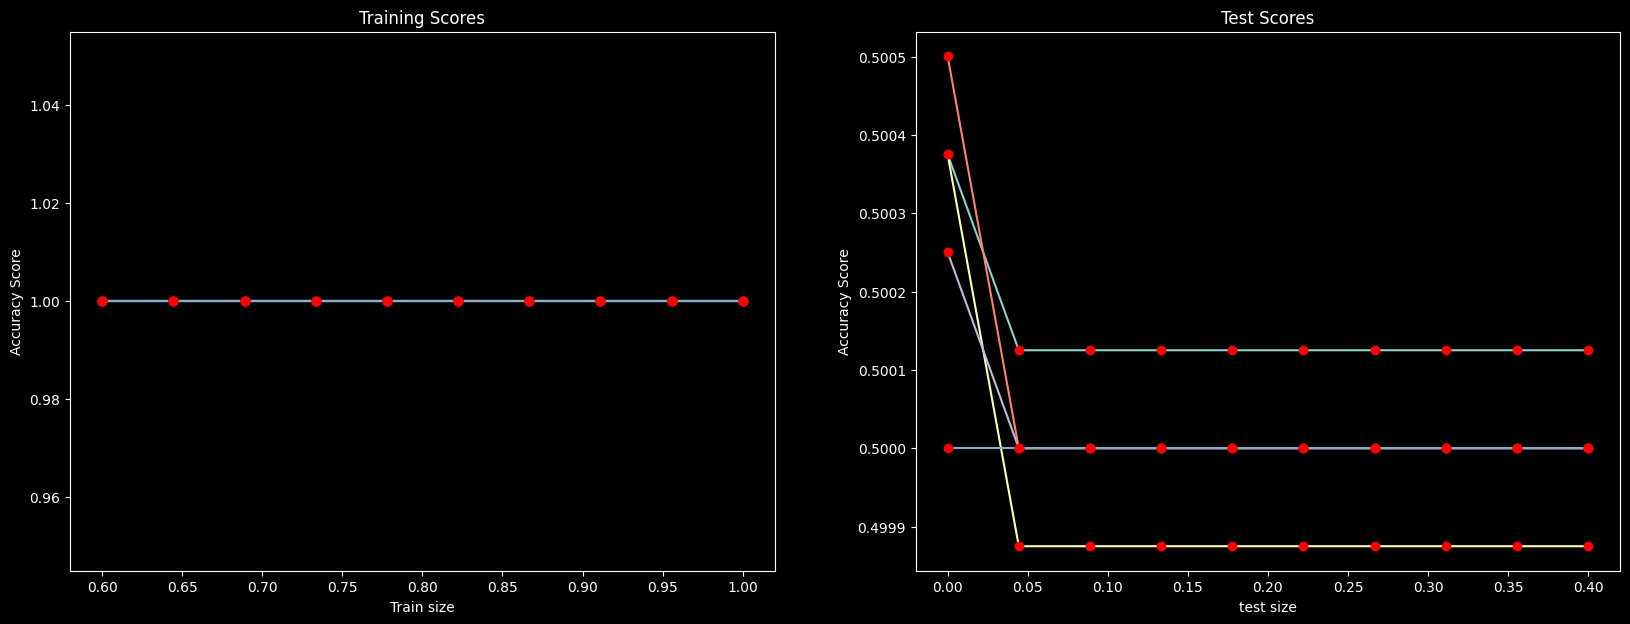

In [69]:
plot_learning_curve(svm_learning_curve_data)

## Random Forest Classifier

In [70]:
rfc_model = RandomForestClassifier(n_estimators=50)

rfc_model.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)

In [71]:
score = accuracy_score(y_test, y_pred_rfc)
print(score)

0.9942541944380602


### Plotting RFC Training curves

In [72]:
rfc_learning_curve_data = learning_curve(rfc_model, 
                                         X_undersam_saved, 
                                         y_underSam_saved,
                                         train_sizes=np.linspace(0.6, 1.0, 10),
                                         n_jobs=-1, 
                                         random_state=42)

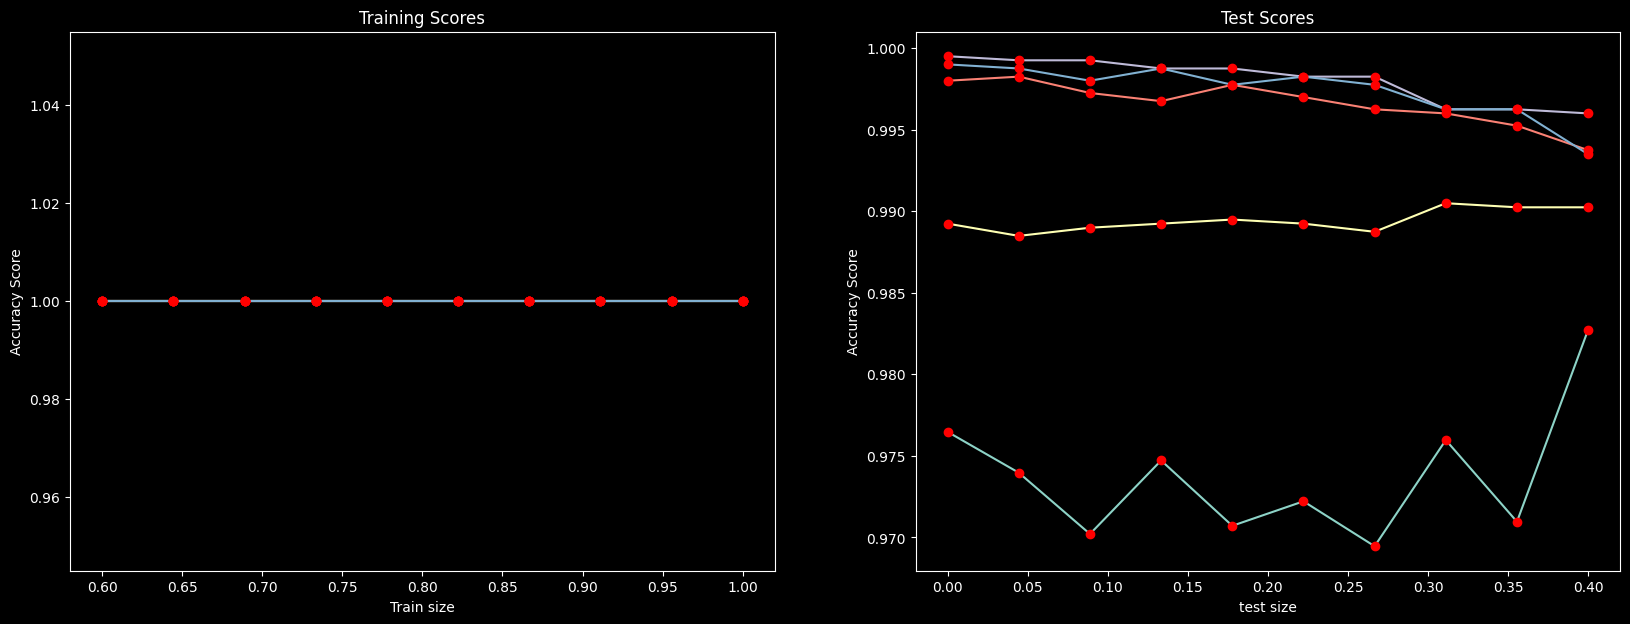

In [73]:
plot_learning_curve(rfc_learning_curve_data)

## KNN Classifier

In [74]:
knnmodel = KNeighborsClassifier(n_neighbors=5)
knnmodel.fit(X_train, y_train)

KNeighborsClassifier()

In [75]:
y_pred_knn = knnmodel.predict(X_test)

In [76]:
score = accuracy_score(y_test, y_pred_knn)
print(score)

0.9871293955412549


In [77]:
knn_learning_curve_data = learning_curve(knnmodel,
                                         X_undersam_saved, 
                                         y_underSam_saved,
                                         train_sizes=np.linspace(0.6, 1.0, 10),
                                         n_jobs=-1, 
                                         random_state=42)

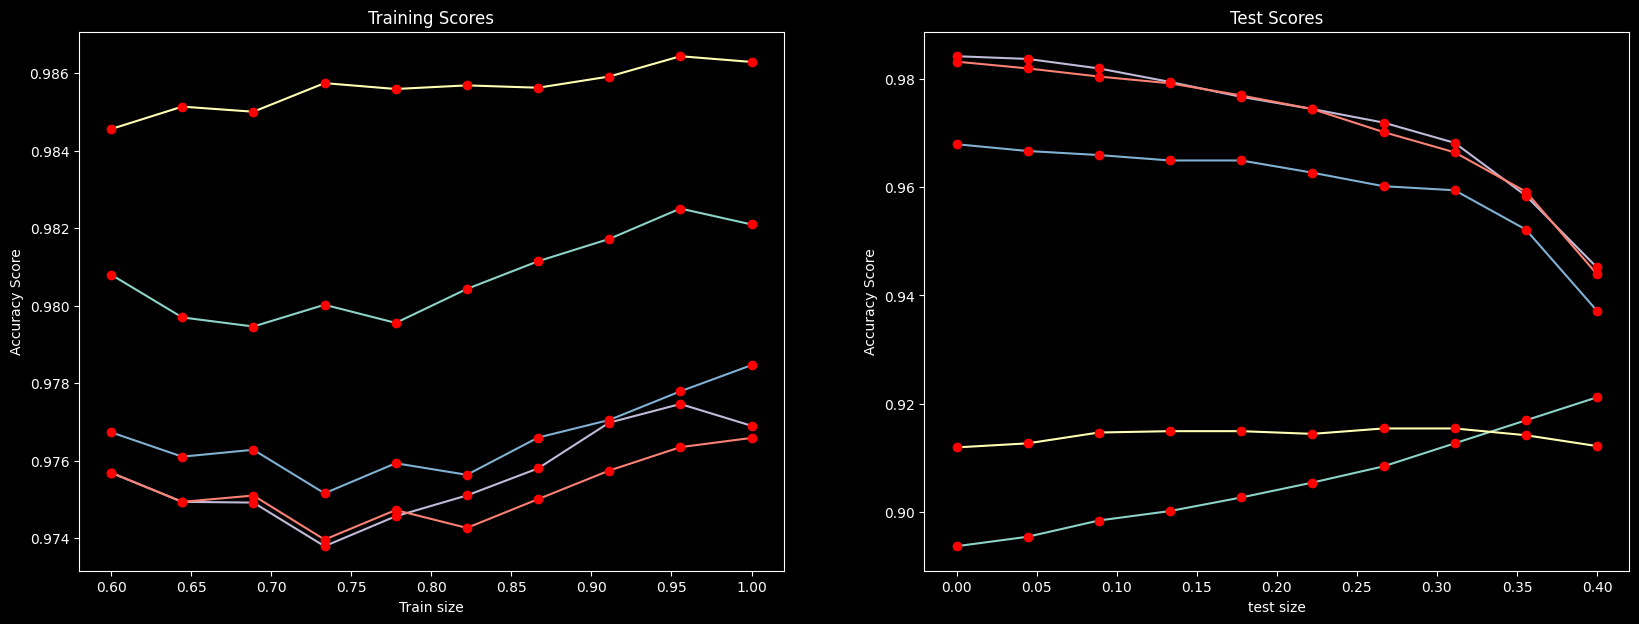

In [78]:
plot_learning_curve(knn_learning_curve_data)

## Extra Trees Classifier

In [79]:
ex_trees = ExtraTreesClassifier(n_estimators=50)
ex_trees.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=50)

In [80]:
y_pred_ex = ex_trees.predict(X_test)

In [81]:
score = accuracy_score(y_test, y_pred_ex)
print(score)

0.9944840266605378


In [82]:
extr_learning_curve_data = learning_curve(ex_trees,
                                         X_undersam_saved, 
                                         y_underSam_saved,
                                         train_sizes=np.linspace(0.6, 1.0, 10),
                                         n_jobs=-1, 
                                         random_state=42)

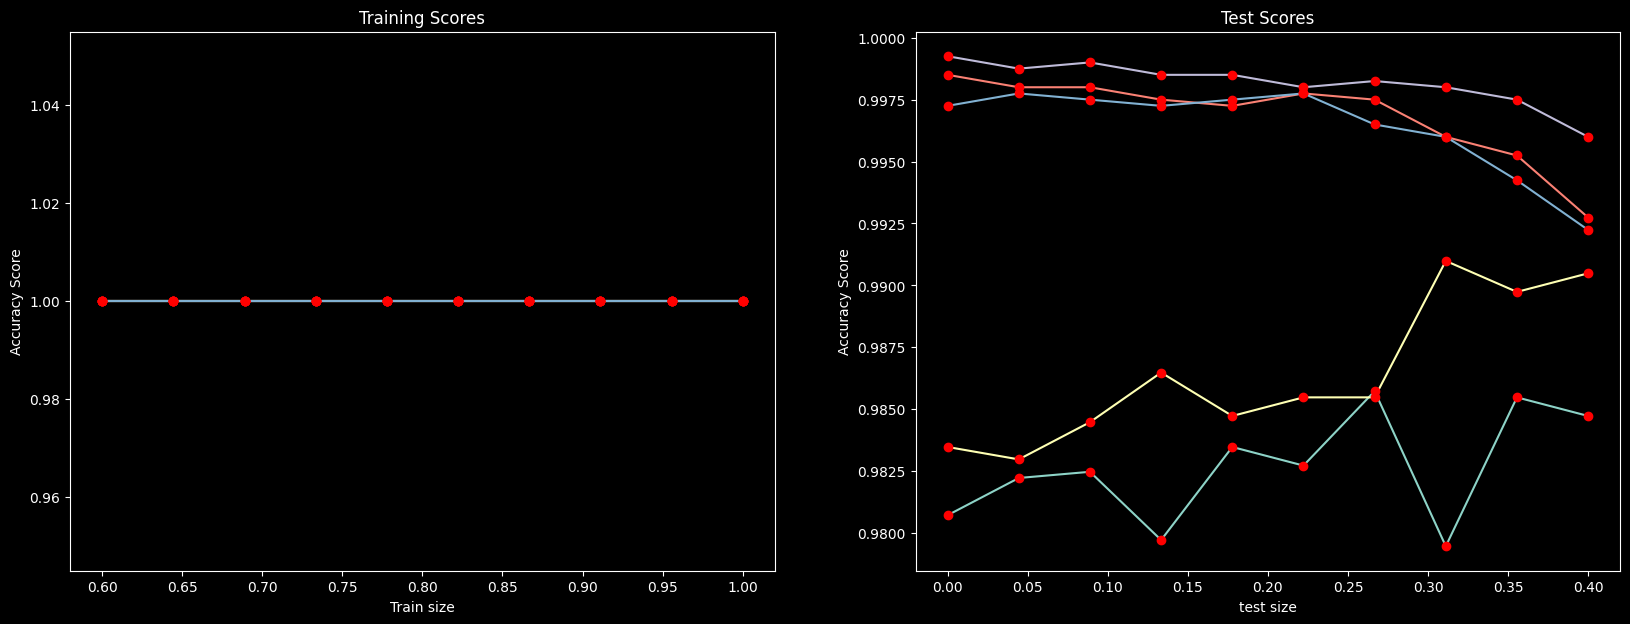

In [83]:
plot_learning_curve(extr_learning_curve_data)

## LSTM Neural Network

In [84]:
X_train_lstm = np.array(X_train).reshape([X_train.shape[0], X_train.shape[1], 1])
X_valid_lstm = np.array(X_valid).reshape([X_valid.shape[0], X_valid.shape[1], 1])
X_test_lstm = np.array(X_test).reshape([X_test.shape[0], X_test.shape[1], 1])

In [85]:
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras import Sequential



lstm_model = Sequential()
lstm_model.add(LSTM(16, return_sequences=True, input_shape=([10, 1]))),
lstm_model.add(Dropout(0.2)),
lstm_model.add(LSTM(16, return_sequences=True, input_shape=([10, 1]))),
lstm_model.add(Dropout(0.2)),
lstm_model.add(LSTM(16, return_sequences=True)),
lstm_model.add(Dropout(0.2)),
lstm_model.add(LSTM(16, return_sequences=True, input_shape=(10, 1),activation='relu')),
lstm_model.add(Dropout(0.2)),
lstm_model.add(LSTM(16, return_sequences=True,activation='relu')),
lstm_model.add(Dense(1, activation='sigmoid'))


lstm_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

print(lstm_model.summary())

c:\Users\Teachar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 16)         │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 16)         │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 10, 16)         │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 10, 16)         │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 10, 16)         │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10, 1)          │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,617 (37.57 KB)

 Trainable params: 9,617 (37.57 KB)

 Non-trainable params: 0 (0.00 B)

None


In [86]:
history_lstm = lstm_model.fit(
    X_train_lstm,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_valid_lstm, y_valid)
)

Epoch 1/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5741 - loss: 0.2347 - val_accuracy: 0.8193 - val_loss: 0.1486
Epoch 2/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8560 - loss: 0.1279 - val_accuracy: 0.8711 - val_loss: 0.1093
Epoch 3/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8853 - loss: 0.1035 - val_accuracy: 0.8843 - val_loss: 0.0950
Epoch 4/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8888 - loss: 0.0963 - val_accuracy: 0.9082 - val_loss: 0.0841
Epoch 5/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9136 - loss: 0.0803 - val_accuracy: 0.9114 - val_loss: 0.0804
Epoch 6/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8887 - loss: 0.0965 - val_accuracy: 0.9130 - val_loss: 0.0784
Epoch 7/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9136 - loss: 0.0776 - val_accuracy: 0.9128 - val_loss: 0.0781
Epoch 8/1000
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9137 - loss: 0.0768 -

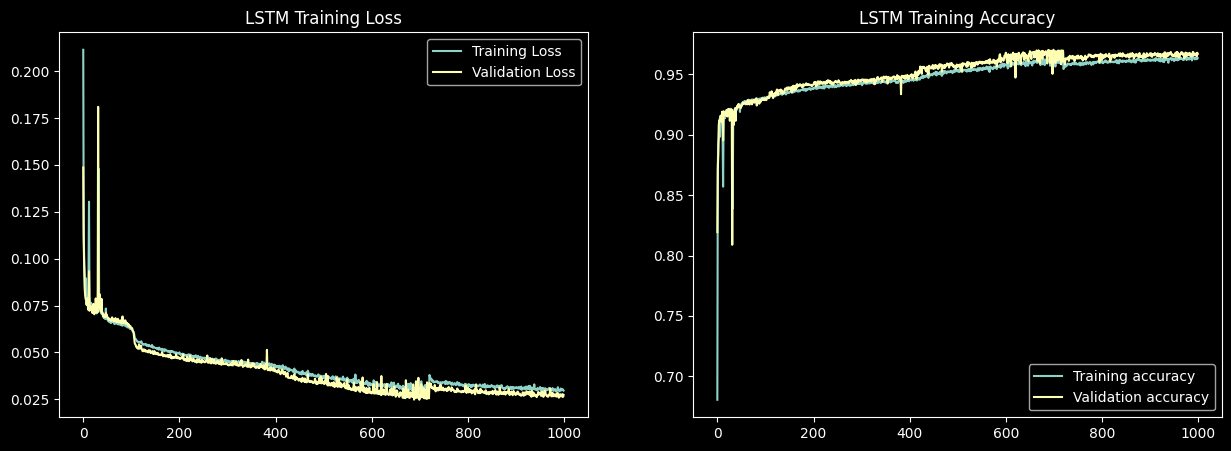

In [87]:
f, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(history_lstm.history['loss'])
ax1.plot(history_lstm.history['val_loss'])
ax1.set_title('LSTM Training Loss')
ax1.legend(['Training Loss', 'Validation Loss'], loc='upper right')

ax2.plot(history_lstm.history['accuracy'])
ax2.plot(history_lstm.history['val_accuracy'])
ax2.set_title('LSTM Training Accuracy')
ax2.legend(['Training accuracy', 'Validation accuracy'], loc='lower right')

f.set_figheight(5)
f.set_figwidth(15)

In [88]:
y_pred_prob = lstm_model.predict(X_test_lstm)
y_pred_lstm = y_pred_prob.argmax(axis=1)

136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [89]:
y_pred_prob_lstm = lstm_model.predict(X_test_lstm)[:, 0]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [90]:
accuracy_score(y_test, y_pred_lstm)

0.4700068949666743

In [91]:
lstm_model.save('./lstm_model.keras')

## ANN

In [92]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential

nn_model = Sequential([
    Dense(50, input_shape=[X_train.shape[1]], activation='sigmoid'),
    Dropout(0.4),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
    
])

nn_model.compile(loss='bce', optimizer='adam', metrics=['accuracy'])

print(nn_model.summary())


c:\Users\Teachar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 50)             │           550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 601 (2.35 KB)

 Trainable params: 601 (2.35 KB)

 Non-trainable params: 0 (0.00 B)

None


In [93]:
history_nn = nn_model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=32,
    validation_data=(X_valid, y_valid))

Epoch 1/1000
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - accuracy: 0.7006 - loss: 0.5570 - val_accuracy: 0.9357 - val_loss: 0.2335
Epoch 2/1000
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.8937 - loss: 0.2773 - val_accuracy: 0.9348 - val_loss: 0.1852
Epoch 3/1000
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.9149 - loss: 0.2322 - val_accuracy: 0.9402 - val_loss: 0.1698
Epoch 4/1000
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.9214 - loss: 0.2142 - val_accuracy: 0.9460 - val_loss: 0.1608
Epoch 5/1000
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.9232 - loss: 0.2169 - val_accuracy: 0.9451 - val_loss: 0.1554
Epoch 6/1000
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.9255 - loss: 0.2060 - val_accuracy: 0.9469 - val_loss: 0.1522
Epoch 7/1000
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.9278 - loss: 0.1998 - val_accuracy: 0.9509 - val_loss: 0.1496
Epoch 8/1000
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.9340 -

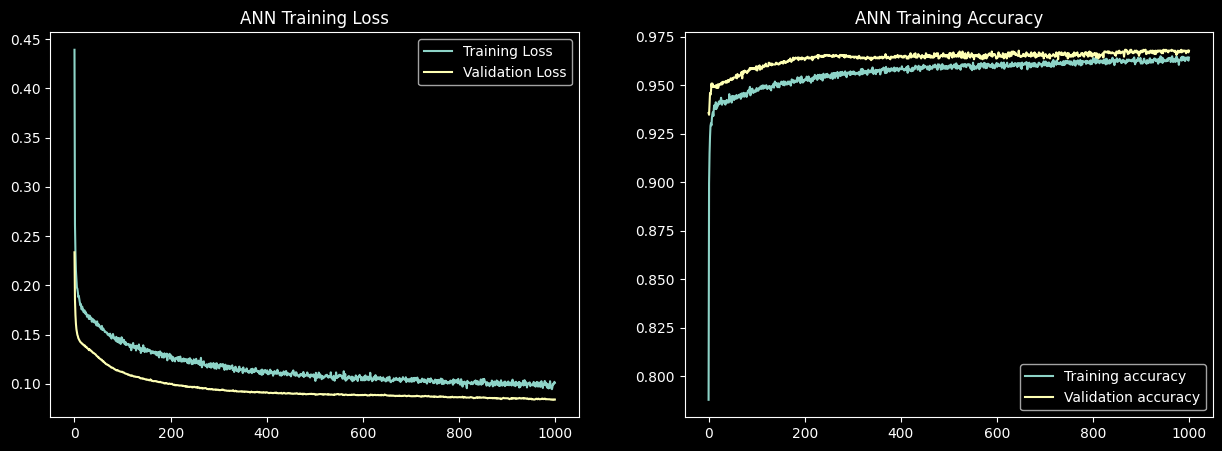

In [94]:
f, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(history_nn.history['loss'])
ax1.plot(history_nn.history['val_loss'])
ax1.set_title('ANN Training Loss')
ax1.legend(['Training Loss', 'Validation Loss'], loc='upper right')

ax2.plot(history_nn.history['accuracy'])
ax2.plot(history_nn.history['val_accuracy'])
ax2.set_title('ANN Training Accuracy')
ax2.legend(['Training accuracy', 'Validation accuracy'], loc='lower right')

f.set_figheight(5)
f.set_figwidth(15)

In [95]:
nn_model.predict(X_test).shape

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step


(4351, 1)

In [96]:
y_pred_prob_nn2 = nn_model.predict(X_test)
y_pred_nn2 = y_pred_prob_nn2.argmax(axis=1)

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


In [97]:
accuracy_score(y_test, y_pred_nn2)

0.5003447483337163

In [98]:
nn_model.save('./nn_model.keras')

# Classifier Evaluation

## Recall: SVM, RFC, KNN, EXTRA TREES, LSTM, ANN

### Confusion Matrices

Confusion Matrix for SVM
[[1772  405]
 [   0 2174]]


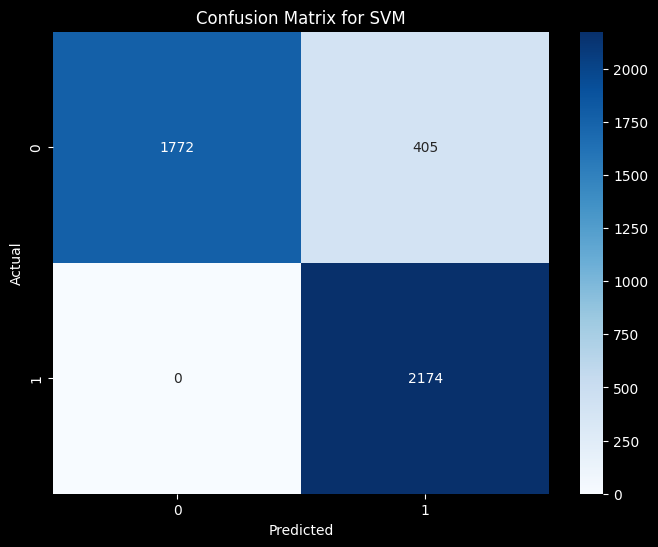

Confusion Matrix for RFC
[[2165   12]
 [  13 2161]]


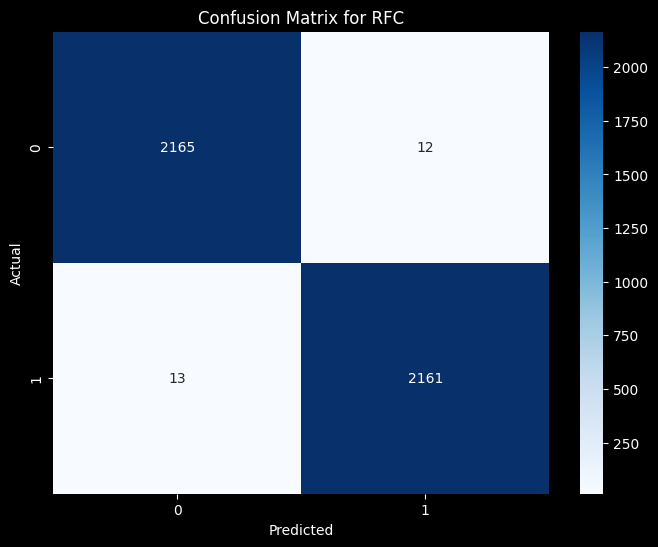

Confusion Matrix for LSTM
[[2028   92   27    8    8    3    3    4    1    3]
 [  13   17  158  215  160  178  216  298  491  428]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]


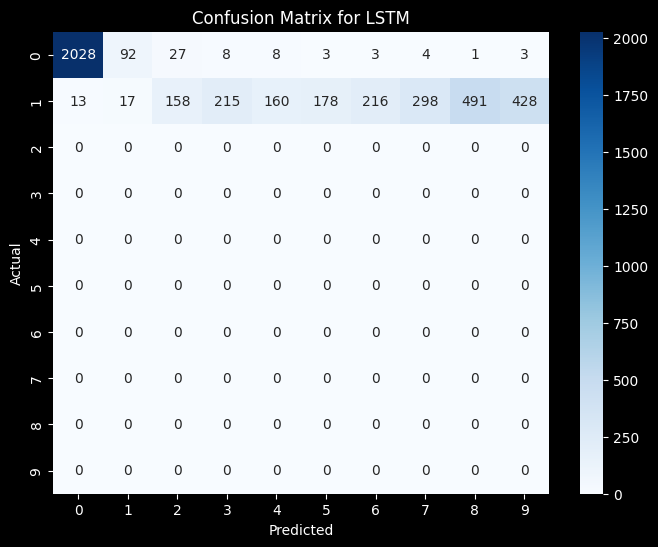

Confusion Matrix for KNN
[[2149   28]
 [  28 2146]]


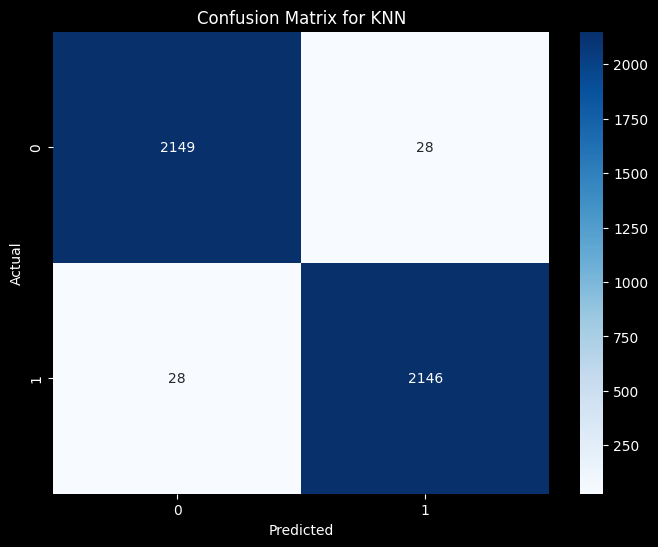

Confusion Matrix for EXTRA TREES
[[2164   13]
 [  11 2163]]


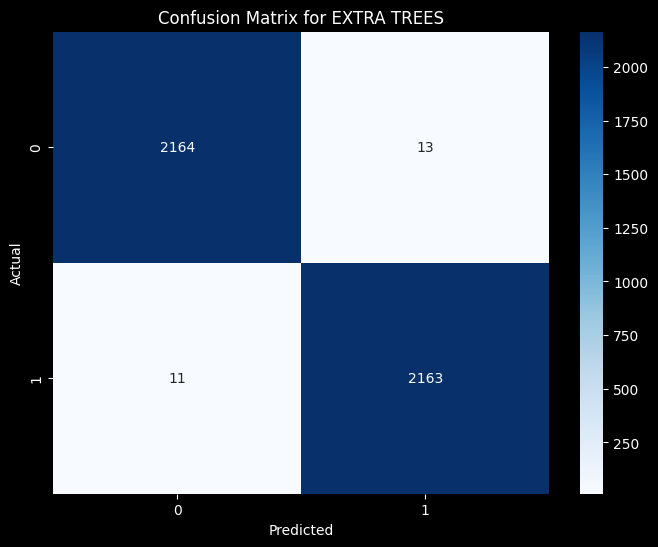

Confusion Matrix for ANN
[[2177    0]
 [2174    0]]


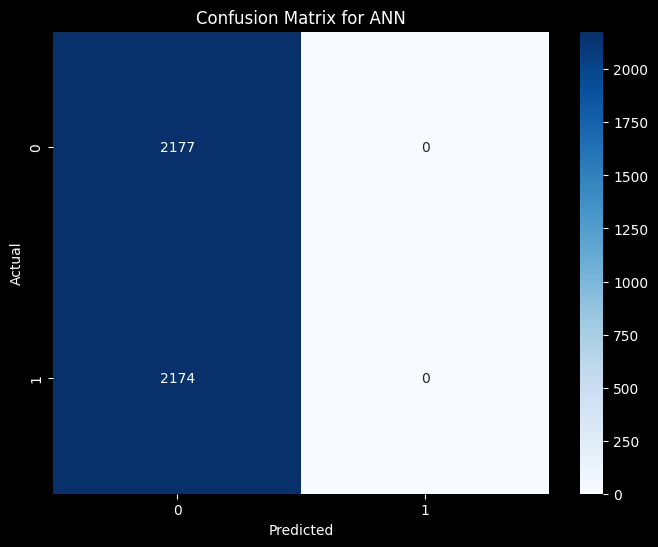

In [99]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns
import matplotlib.pyplot as plt

models = ['SVM', 'RFC', 'LSTM', 'KNN', 'EXTRA TREES', 'ANN']
predictions = [y_pred_svm, y_pred_rfc, y_pred_lstm, y_pred_knn, y_pred_ex, y_pred_nn2]

for i in range(len(models)):
    print(f'Confusion Matrix for {models[i]}')
    conf_mat = confusion_matrix(y_test, predictions[i])
    print(conf_mat)
    
    # Plotting the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix for {models[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


### ROC (Receiver Operating Characteristic) Curves

In [100]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(model, X_test, y_test):
    # Predict probabilities
    y_score = model.predict_proba(X_test)[:,1]

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


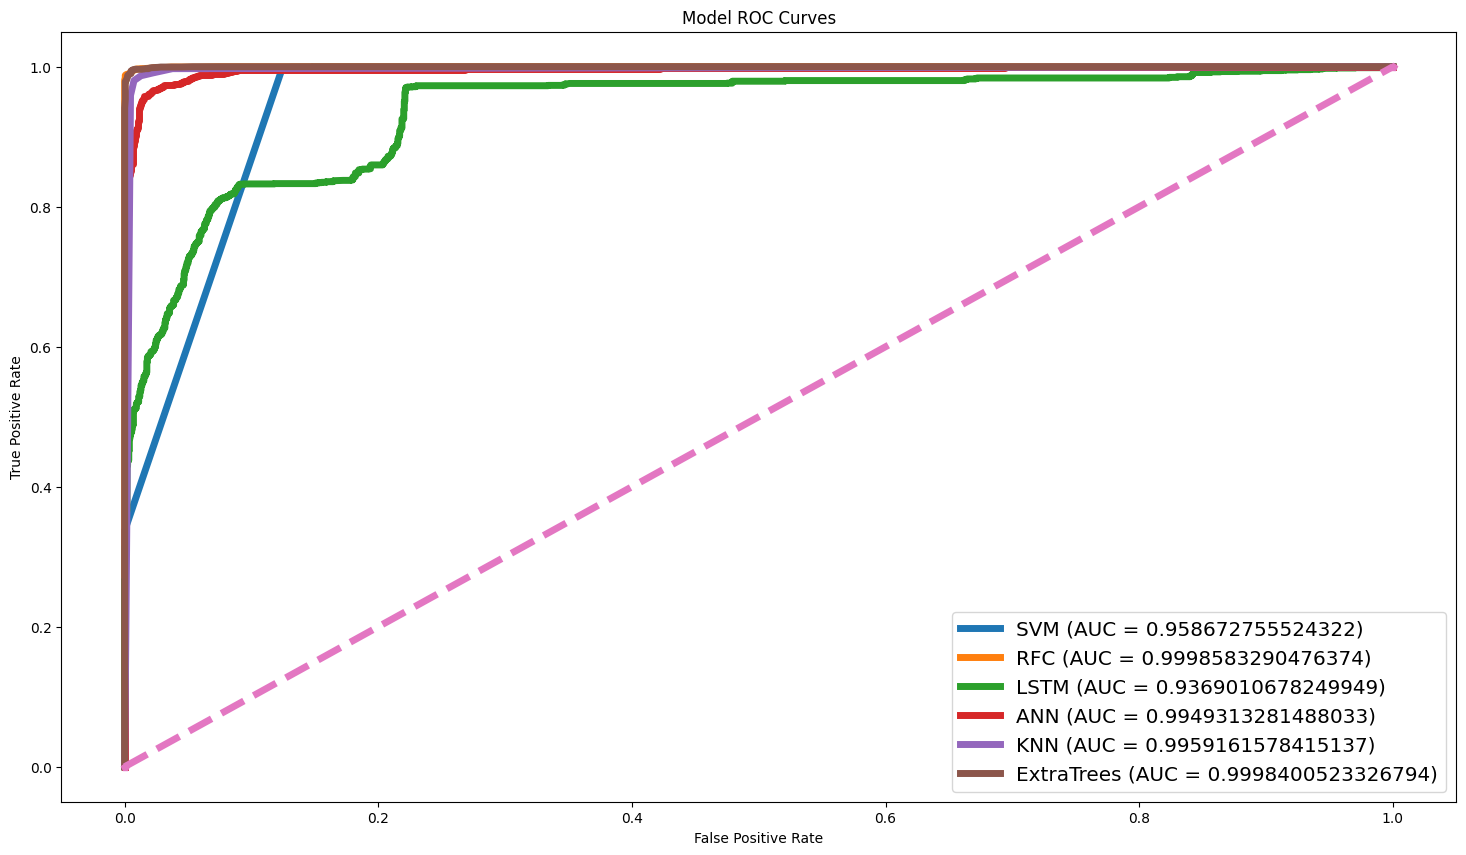

In [101]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.style.use('default')
plt.figure(figsize=(18, 10))
plt.title('Model ROC Curves')

# Plot SVM ROC curve
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_model.decision_function(X_test))
svm_auc = auc(svm_fpr, svm_tpr)
plt.plot(svm_fpr, svm_tpr, linewidth=5, label=f'SVM (AUC = {svm_auc})')

# Plot RFC ROC curve
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_model.predict_proba(X_test)[:,1])
rfc_auc = auc(rfc_fpr, rfc_tpr)
plt.plot(rfc_fpr, rfc_tpr, linewidth=5, label=f'RFC (AUC = {rfc_auc})')

# Plot LSTM ROC curve
lstm_fpr, lstm_tpr, _ = roc_curve(y_test, y_pred_prob_lstm)
lstm_auc = auc(lstm_fpr, lstm_tpr)
plt.plot(lstm_fpr, lstm_tpr, linewidth=5, label=f'LSTM (AUC = {lstm_auc})')

# Plot ANN ROC curve
ann_fpr, ann_tpr, _ = roc_curve(y_test, y_pred_prob_nn2)
ann_auc = auc(ann_fpr, ann_tpr)
plt.plot(ann_fpr, ann_tpr, linewidth=5, label=f'ANN (AUC = {ann_auc})')

# Plot KNN ROC curve
knn_fpr, knn_tpr, _ = roc_curve(y_test, knnmodel.predict_proba(X_test)[:,1])
knn_auc = auc(knn_fpr, knn_tpr)
plt.plot(knn_fpr, knn_tpr, linewidth=5, label=f'KNN (AUC = {knn_auc})')

# Plot ExtraTrees ROC curve
et_fpr, et_tpr, _ = roc_curve(y_test, ex_trees.predict_proba(X_test)[:,1])
et_auc = auc(et_fpr, et_tpr)
plt.plot(et_fpr, et_tpr, linewidth=5, label=f'ExtraTrees (AUC = {et_auc})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'p--', linewidth=5)

plt.legend(fontsize='x-large')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


## Testing on Original Data Unsampled data

### SVM

In [102]:
X_full_normalized = pd.DataFrame(normalize(original_features, norm='l2', axis=1))
X_full_normalized.columns = X_undersam_saved.columns

In [103]:
X_features_kept_full = X_full_normalized[cor_feature]

y_pred_svm_full = svm_model.predict(X_features_kept_full)

print(accuracy_score(y, y_pred_svm_full))

0.9615240869387645


### RFC

In [104]:
y_pred_rfc_full = rfc_model.predict(X_features_kept_full)
print(accuracy_score(y, y_pred_rfc_full))

0.9615240869387645


## KNN

In [105]:
y_pred_knn_full = knnmodel.predict(X_features_kept_full)
print(accuracy_score(y, y_pred_knn_full))

0.9615240869387645


## Extra Trees

In [106]:
y_pred_ex_full = ex_trees.predict(X_features_kept_full)
print(accuracy_score(y, y_pred_ex_full))

0.9615240869387645


### LSTM

In [107]:
X_features_kept_full_lstm = np.array(X_features_kept_full).reshape(X_features_kept_full.shape[0], 
                                                                   X_features_kept_full.shape[1], 
                                                                   1)

In [108]:
y_pred_probabilities = lstm_model.predict(X_features_kept_full_lstm)
y_pred_lstm_full = np.argmax(y_pred_probabilities, axis=1)
accuracy_score(y, y_pred_lstm_full)

8111/8111 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


0.0

### ANN

In [109]:
y_pred_probs = nn_model.predict(X_features_kept_full)
y_pred_nn_full = np.argmax(y_pred_probs, axis=1)
accuracy_score(y, y_pred_nn_full)

8111/8111 ━━━━━━━━━━━━━━━━━━━━ 2s 248us/step


0.038475913061235496

## Applying Ensemble Learning

Confusion Matrix for Ensemble Model:
[[2156   21]
 [  23 2151]]
Accuracy of Ensemble Model: 0.9898873822109859


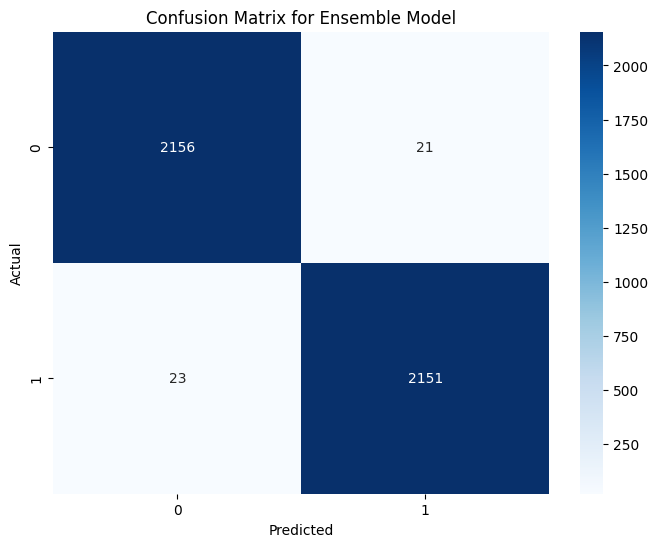

In [123]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Instantiate SVM model with probability=True
svm_model = SVC(probability=True)

# Remove lstm_model from the ensemble
ensemble_clf = VotingClassifier(estimators=[
    ('svm', svm_model),
    ('rfc', rfc_model),
    ('knn', knnmodel),
    ('ex', ex_trees),
], voting='soft')

# Train the ensemble model
ensemble_clf.fit(X_train, y_train)

# Evaluate the ensemble model
ensemble_predictions = ensemble_clf.predict(X_test)
print("Confusion Matrix for Ensemble Model:")
conf_mat_ensemble = confusion_matrix(y_test, ensemble_predictions)
print(conf_mat_ensemble)
accuracy = accuracy_score(y_test, ensemble_predictions)
print("Accuracy of Ensemble Model:", accuracy)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_ensemble, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Ensemble Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

